# Fundamentos de Orquestração

tem como objetivo fazer com que diferentes etapas (pipelines) de uma operação estejam sincronizadas, coordenadas e ocorram, de modo esperado, de acordo com um trigger

o histórico de orquestração se inicia com a **pre-Unix era** onde eram realizados **processos em batch de modo manual**. suas limitações eram que, devido à sua manualidade, era **sujeita a erros dificeis de detectar e debugar**, bem como a **falta de padrão** de formato de dados, protocolos e técnicas de processamento

a era seguinte foi a **early-computing era**. aqui eram feitos usos de **CRON, AutoSys e Informatica**, softwares que serviam para schedular tarefas e processos de modo mais prático que o anterior e dedicados ao ETL. suas limitações se deviam aos proprietários dos softwares, que **encareciam a orquestração**, e também a **falta de features** para realização de workloads de maior complexicidade e manutenção geral

em seguida teve-se **data & open-source renaissence**. aqui ferramentas open-source como **Luigi, Azkaban e Oozie** nasciam e houve um aumento na complexicidade de dados e seus tamanhos, aumento da complexicidade de realizar schedules de ETL e o aumento de desenvolvimento de projetos open-source para gerenciamento de workflows apresentando dinamismo, escalabilidade e extensibilidade. suas limitações eram que algumas ferramentas suportavam somente Hadoop, outras somente XML ou arquivos de configuração, tendo uma **falta de padrão de operação** entre as ferramentas

por fim temos o nosso presente momento a **modern data orchestration** onde temos ferramentas como **Dagster e Airflow**, cada qual com seu paradigma. O Airflow tem como vantagens ter seus pipelines definidos via código em Python, habilidade de integração com muitos sistemas externos, schedule baseados em tempo e eventos e features ricas em observabilidade devido a sua UI na porta 8080

# Apache Airflow - Aspectos Teóricos

## **O que é, quais as vantagens, suas principais características e aplicações**

**se trata de uma ferramenta de orquestração de modo autoral via código, scheduling e monitoramente de pipelines**

apresenta como vantagens:

*   tem seus pipelines escritos em Python

*   é um projeto open-source

*   tem uma grande comunidade

*   fornece uma UI que facilita a observabilidade dos seus pipelines

*   permite schedular baseado em tempo ou eventos

*   é altamente extensível, com diversas integrações e permite a construção de novas integrações se necessário

algumas das pessoas que utilizam Airflow são:

*   Engenheiro de dados: constrói pipelines com o intuito de fazer a infraestrutura da corporação, além de fazer a manutenção e gerenciamento dos mesmos

*   Cientista de dados: construção de pipelines que fazem um pré-processamento de dados e analisar novos datasets

*   Analista de dados: criação de pipelines que extraem de uma DB via SQL dados que alimentam um dashboard ou relatório

*   Engenheiro de ML: faz uso de orquestração para retreinar e validar uma ML   

*   Dentre outros

algumas de suas aplicações são:

*   data-powered applications: são aplicações que são sistemas ou programas cujo propósito é atribuir dados a funções, resultando num valor

*   critical operations processes: se tratam de processos que se referem a workflows essenciais para o funcionamento da empresa

*   analytics & reporting: compete ao processo de análises sistemáticas de dados gerando como resultados, por exemplo, um dashboard, que deve ser atualizado constantemente mediante a novos dados

*   MLOps & AI: envolve deploys e gerenciamento de modelos de ML dentro de workflows operacionais

algumas considerações devem ser feitas ao usar Airflow:

*   **não é uma ferramenta de ETL e sim de orquestração**. pode ser feito ETL dentro do Airflow, mas é complicado solucionar eventuais problemas e bugs, não sendo recomendado

*   **não é uma ferramenta de streaming. ela atua em batches** porém, se acoplada ao Kafka, pode sim atuar no ramo de streaming

*   **demanda de infraestrutura para ter escalabilidade**

## **Directed-Acyclic Graph (DAG)**

**somente são automaticamente identificadas por padrão para serialização se possuirem `airflow` ou `dag` no seu nome de arquivo python**

esse comportamento pode ser alterado se mexido na variável de ambiente `DAG_DISCOVER_SAFE_MODE`

constitui o principal objeto do airflow

descreve o fluxo dos processos com que serão orquestradas as tasks

**o paradigma de orquestração é com foco nas tasks, desse modo, os nodes são o que cada task realiza**

a DAG é acíclica e direta pois, desse modo evita conflitos com as dependências entre elas mesmas, evitando o colapso do processo

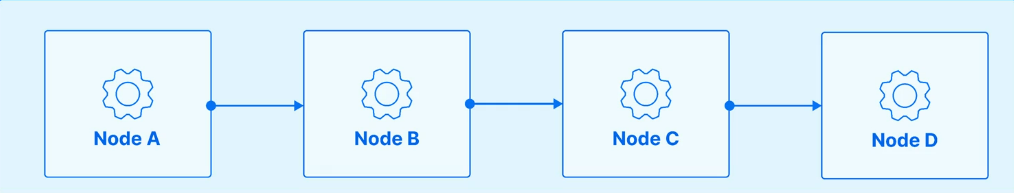

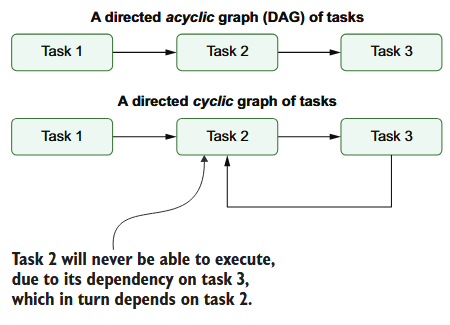

**uma das vantagens do uso de DAGs é o fato de ela permitir que tarefas independentes possam ser executadas concomitantemente por meio de paralelismo, aumentando a eficiência de processos se comparado a um bloco monolítico de códigos**

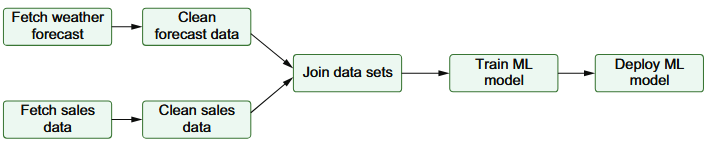

**outra vantagem é observada em situações onde há quebras. no caso de uma DAG o problema pode ser solucionado consertando somente a Task problemática e reexecutá-la. no caso de quebras em um bloco monolítico de códigos, é necessário fazer o debug e rodar todo o código novamente, reduzindo performance**

**quando pausado uma DAG e feito o restart da mesma, as contagens de runs zeram e voltam a ser contabilizadas após o restart**

**catchup** consiste no processo de, ao pausar uma DAG e fazer o restart, as DAGs executadas serão somente aquelas que não foram engatilhadas (sofreram o processo de trigger) em todo seu histórico

**backfill** é o processo onde todas as runs de DAGs de modo histórico são executadas novamente, num dado intervalo de tempo desejado. **disponível somente no CLI**

para DAGs engatilhadas por datas (todos os dias por exemplo) e que extraem dados de uma base que, por exemplo se atualiza a cada 30 dias, é ineficiente realizar a análise de todo seu catalogo. para tal podemos contornar essa situação fazendo partições de extrações de modo diário, exportando para cada dia de extração um novo arquivo

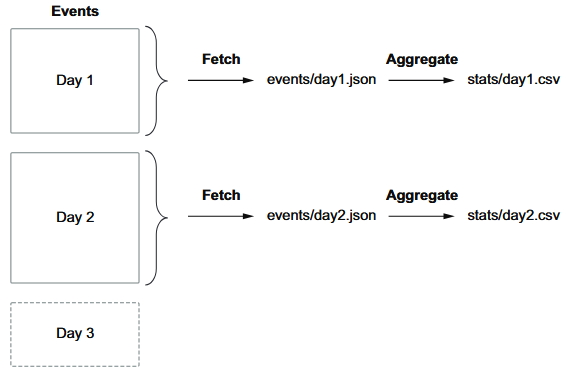

fazendo uso da notação Jinja `{{nome_da_variável}}` podemos acessar variaveis de ambientes da DAG como por exemplo `execution_date`, `previous_execution_date`, `next_execution_date`, dentre outras. no exemplo a seguir, elas são implementadas como parametros de query dentro da propria URL

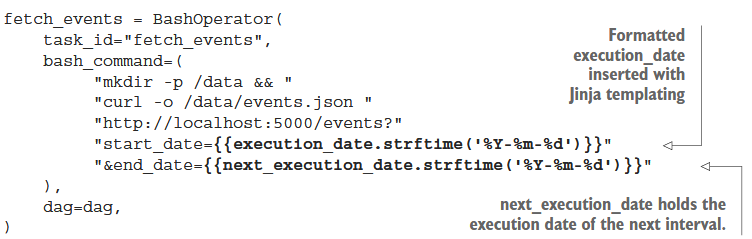

como o uso desses parametros são muito recorrentes o proprio Apache Airflow nos fornece abreviaturas destes parametros facilitando nosso trabalho:

*   **ds** = retorna a data de schedule no formato YYYY-MM-DD

*   **ds_nodash** = retorna a data de schedule no formato YYYYMMDD

*   **next_ds** = retorna a proxima data de schedule no formato YYYY-MM-DD

*   **next_ds_nodash** = retorna a proxima data de schedule no formato YYYYMMDD

*   **prev_ds** = retorna a data do schedule anterior no formato YYYY-MM-DD

*   **prev_ds_nodash** = retorna a data do schedule anterior no formato YYYYMMDD

usando estes parametros simplificados o snippet acima fica da seguinte maneira

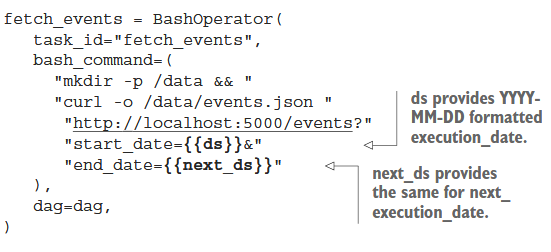

esses parametros podem ser aproveitados ainda para fazer partições de dados com base na data do schedule como por exemplo:

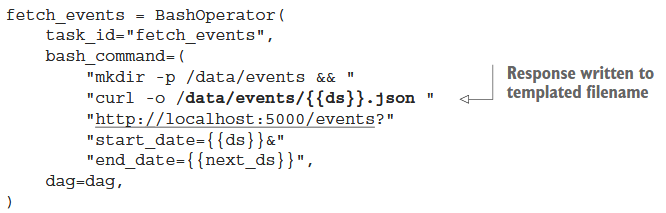

## **DAG Run**

ocorre em três situações:

*   engatilhadas manualmente via UI

*   engatilhadas mediante a um evento que ocorreu

*   engatilhadas devido à um horário, data ou intervalo de tempo definido

**uma DAG Run é uma instância de uma dada DAG que está sendo executada**

podem ser executadas em paralelo para a mesma DAG

**uma DAG Run consiste no processo de passar as tasks à queue do executor startando o seu processamento de acordo com os workers disponíveis**

**logical_date/execution_date** definido pelo **start_date=**. quando uma DAG for executada manualmente, seu logical_date é o da execução manual e seu valor é igual ao start_date. quando executada de modo programático, logical_date indica o valor de quando se inicia o intervalo de execução

**duration/current interval** definido pelo **schedule=**. diz respeito à duração que a DAG run levou para ser executada. a próxima DAG Run é efetuada em start_date = logical_date + schedule_interval. **a execução ocorre somente após o período passado para esta kwarg**

**a DAG começa a sofrer schedules a partir de `start_date` `e` após o tempo decorrido passado em `schedule`**

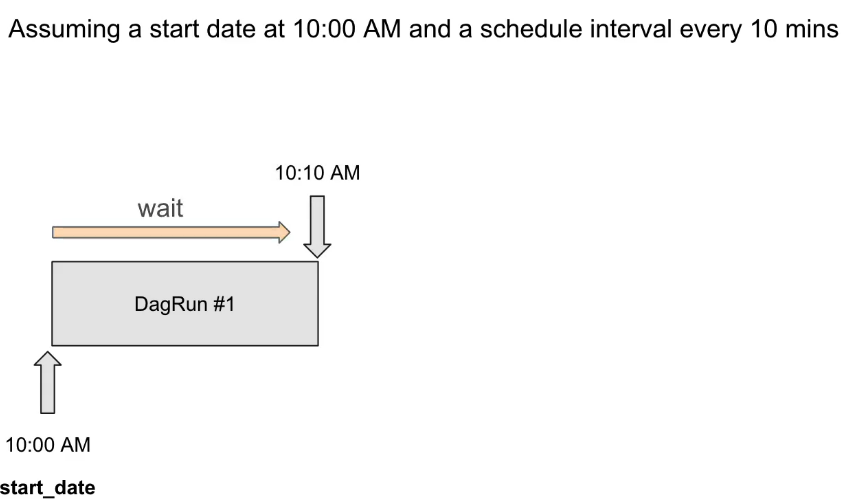

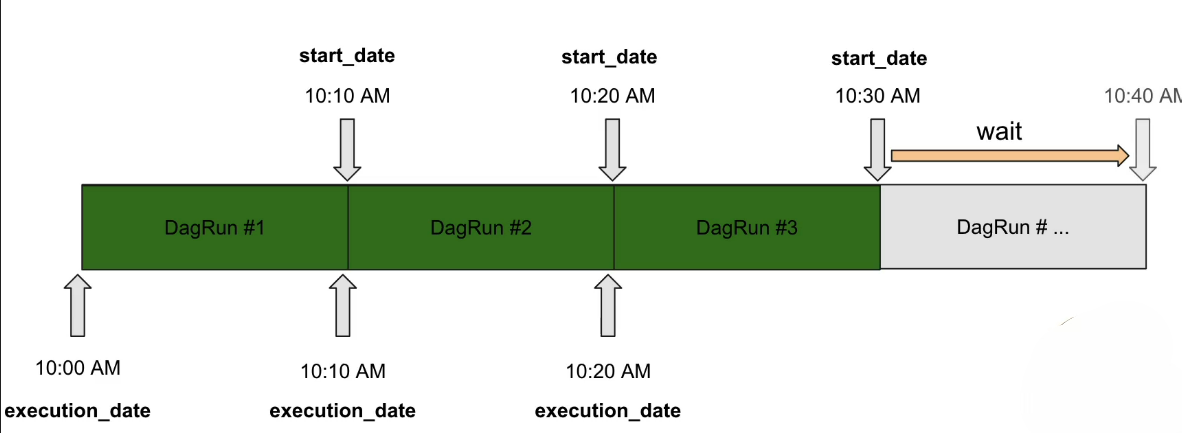

além de CRON expressions e valores pré-estabelecidos pelo Apache Airflow, que são determinísticos, isto é, sempre é executada em uma hora definida, **podemos schedular com base em intervalos de tempo tomando como base o presente momento usando `datetime.timedelta`**

**`datetime.timedelta` são mais precisos em relação a intervalos de tempo nos limiares**. por exemplo. se uma DAG com `schedule="0 0 3 *"` tem execução a cada 3 dias, e tomando como start_date e execution_date o dia 28 de junho, ela só será executada no dia 3 de julho, pois, o mês se finda e inicia outro. com `datetime.timedelta` esse imprevisto é corrigido (`schedule=timedelta(days=3)`)

## **Task**

é uma unidade do node da DAG como citado anteriormente

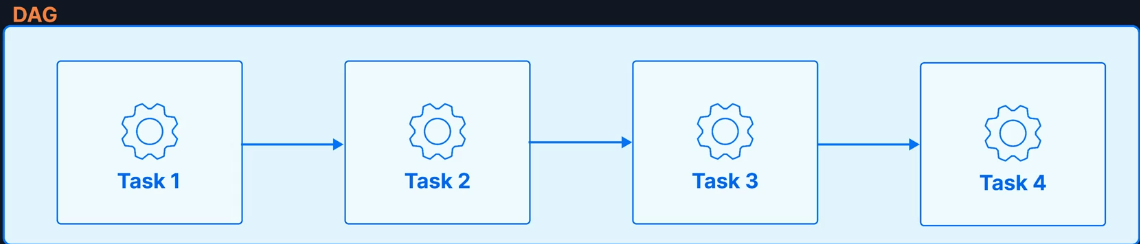

Tasks tem como função envolver os Operators, gerenciar sua execução e verificar se está funcionando corretamente

permite ao usuário focar mais no trabalho que deve ser feito via Operators e menos no processo de execução

podem ser monitoradas via UI, tendo o seguinte fluxo e status:

![Task lifecycle.png](<attachment:Task lifecycle.png>)
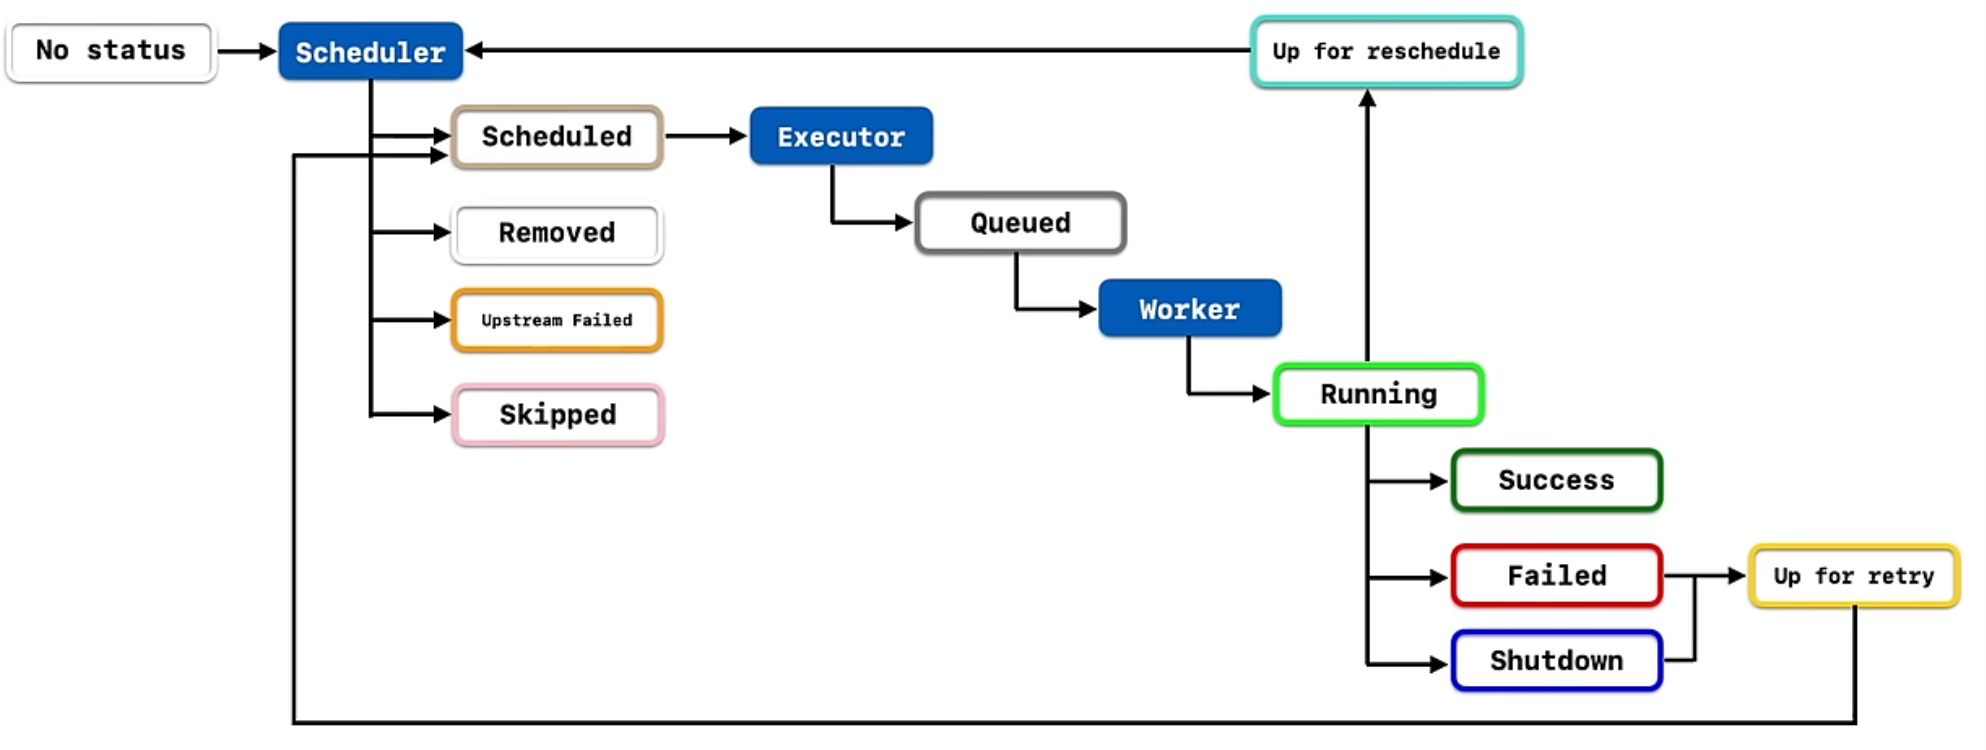

## **Task Instances**

são instancias das tasks definidas no corpo da DAG e geradas ao logo da DAG Run

## **Task Groups**

podem ser usados com o intuito de organizar as Tasks em grupos hierarquicos

util para criar padrões repetidos de Tasks

## **Edge Labels**

tem como intuito explicar o que ocorre entre uma task e outra

## **Control Flow**

trata do controle sobre a forma com que as tasks serão executadas e suas respectivas ordens

**por padrão, uma task é executada somente após suas dependências terem sido satisfeitas de modo linear, mas isso pode ser alterado**

pode ser realizada de 4 maneiras:

*   **Branching**: permite selecionar qual task será executada tomando como base um condicional

*   **Trigger Rules**: seta condições em que uma DAG irá performar a execução de uma task

*   **Setup and Teardown**: define relações de setup e teardown

*   **Latest Only**: uma forma especial de execução em Branching que performa a DAG Run somente executadas no presente

*   **Depends On Past**: as tasks podem depender de si mesmas mas de uma DAG Run anterior

### *Branching*

permite escolher qual rota adotar dependendo de resultados de tasks anteriores

**neste modo escolhemos quais tasks não queremos que sejam executadas de acordo com um condicional**

desse modo, nem todas as tasks são executadas no processo de DAG Run

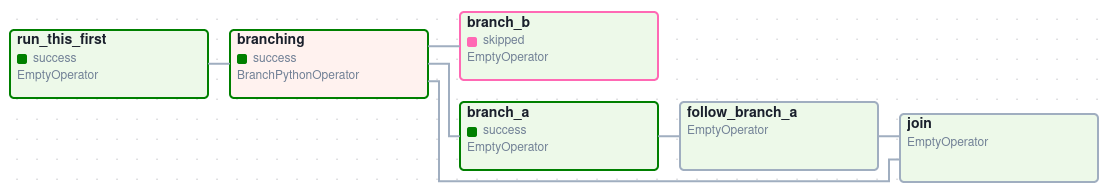

### *Trigger Rules*

por meio desta técnica podemos definir como/quando um task downstream a outra(s) é executada

por padrão somente é executada se todas upstreams a ela tiverem sucesso, mas isso pode ser alterado

### *Setup and Teardown*

### *Latest Only*

usada em situações onde a DAG Run antecede à última DAG Run prevista, como por exemplo, Backfill

**seu uso faz com que tasks downstream a ela não sejam executadas em situações onde a DAG Run antecede a última DAG Run prevista**

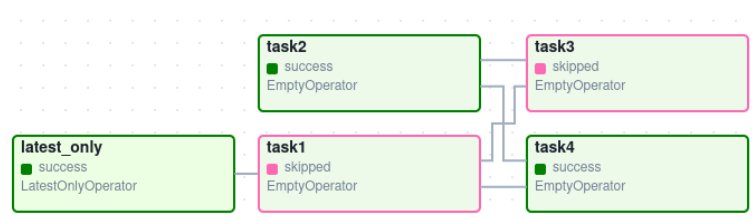

### *Depends On Past*

nesse caso somente tasks de DAG Runs que antecedem à ultima DAG Run programada serão executadas e que tenham sido status de sucesso, é o oposto de Latest Only

ela é executada somente na primera DAG Run, nas demais somente pode ser feita em DAG Runs anteriores à ultima

## **Operator**

**tem como proposta executar um específico trecho de código para uma task específica**

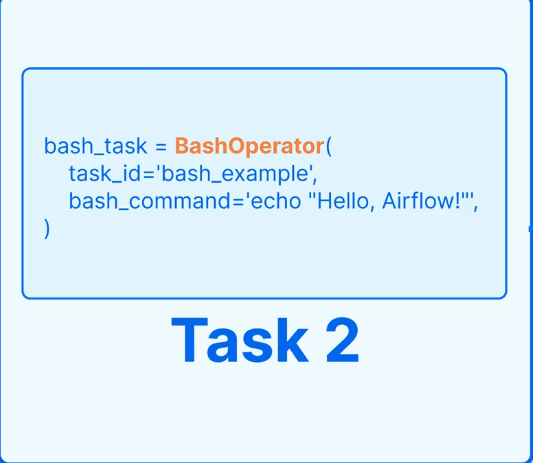

existem 3 tipos de operators:

1.  **Action**: são operadores que executam uma tarefa, como por exemplo o **PostgresOperator** e o **PythonOperator**

2.  **Transfer**: tem como função realizar a transferência de dados, como por exemplo o **S3toSnowflakeOperator**

3.  **Sensor**: fazem com que o código aguarde por um evento para somente então realizar uma task, como por exemplo o **FileSensor**

Operators permitem processar um dado trecho de código em Bash, por exemplo, e em seguida, rodar esse output como um imput em um código Python

## **Connections**

um conjunto de parâmetros como login, senhas, hostname, dentre outros, que permite a conexão de DAG a sistemas externos, como por exemplo Snowflake ou uma API de modo criptografado para alguns parâmetros

## **XCom**

usado para **transferencia de dados e dados entre tasks**

**faz uso da metadata database ao inves de um sistema externo**

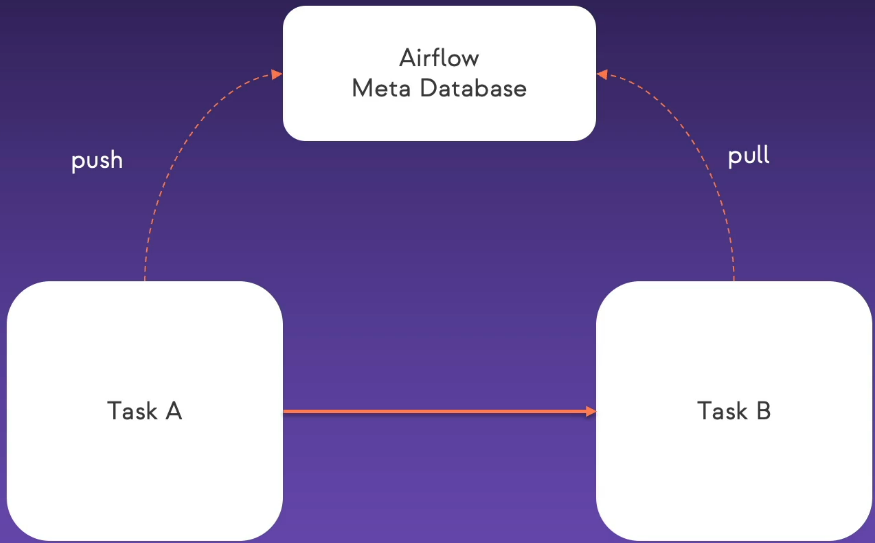

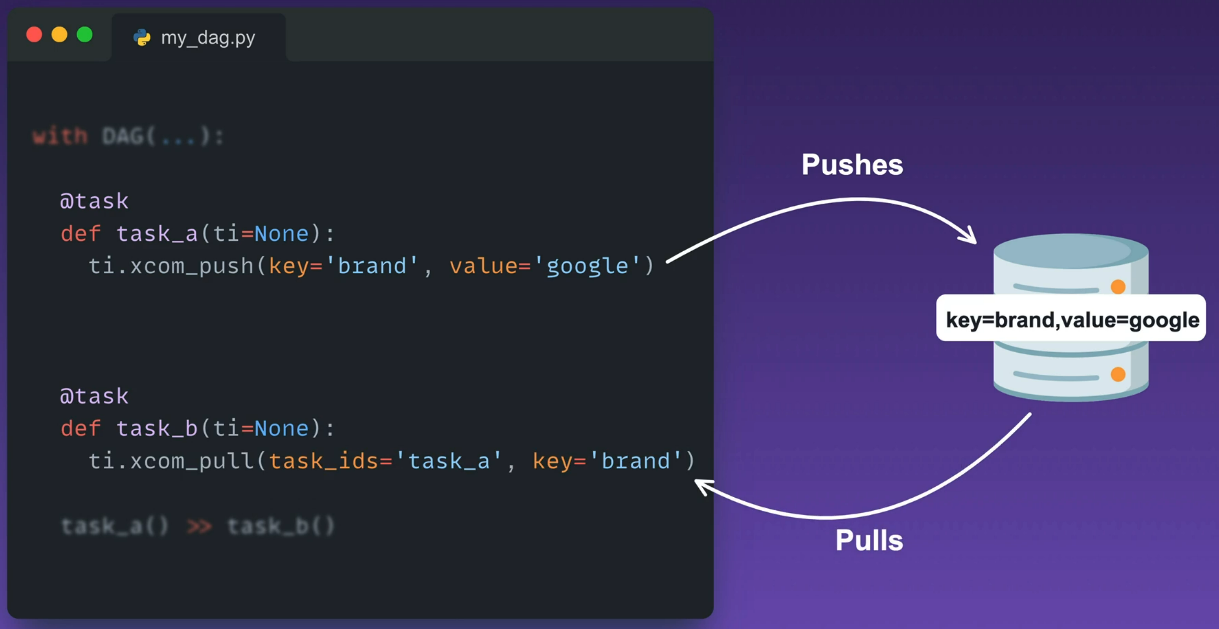

**suas limitações são:**

*   tamanho de dados que se deseja compartilhar

*   o tipo de database usado como metadata database: o tamanho dos arquivos permitidos a serem compartilhados é limitado pelo tipo de metadata database (MySQL 64 MB, PostgreSQL 1GB, SQLlite 2 GB)

*   os arquivos compartilhados entre XCOMs devem ser serializáveis em JSON, aceita também classes decoradas com `@dataclass` e `@attr.define`

muitos Operators e `@task` aceitam um kwarg `return_value:Optional[str]=None` que faz com que o valor passado a ele seja a key_id da XCom se `do_xcom_push:Optional[bool]=True`

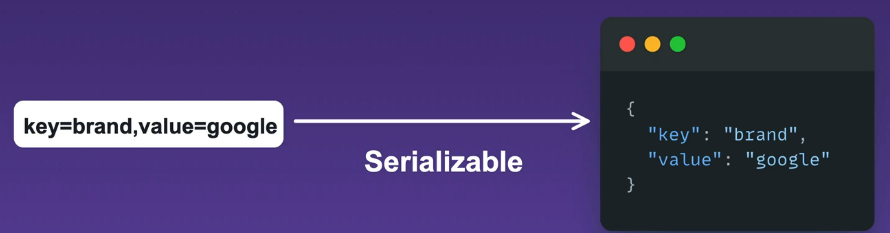

XCom's podem ser armazenadas em locais como S3 ao inves da metadata database usando o terminal `airflow config list` e definido suas variaveis na seção common.io como `xcom_objectstorage_path`, `xcom_objectstorage_threshold` (define o tamanho maximo para o arquivo a ser executado pelo metadata database) e `xcom_objectstorage_compression`. para a integração ser feita com sucesso, o valor de `xcom_backend`, situado no core, deve ser setado para `airflow.providers.common.io.xcom.backend.XComObjectStorageBackend`, dado que por padrão ele usa uma XCom generica

**quando armazenado os dados da XCom em um serviço externo como S3, após ser acessado esse dado, temos acesso a uma referencia do dado e não o dado propriamente dito**

## **Variáveis**

funcionam como variaveis comum em python

tem como intuito evitar o hard coding entre DAGs que consomem da mesma coisa

**facilitam o update de DAGs uma vez que se alterado o valor da variável, todas irão se alterar**

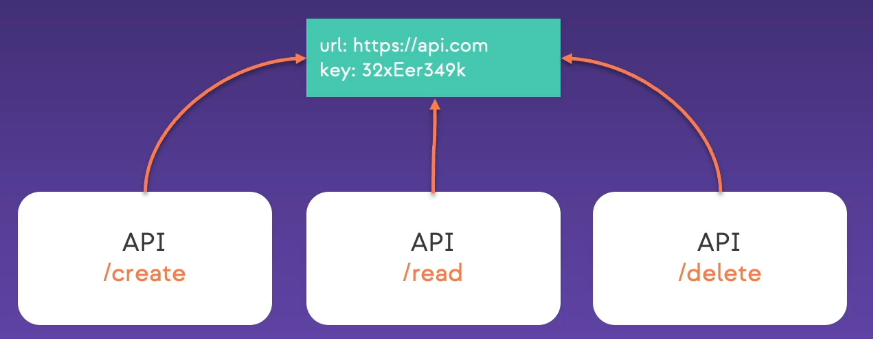

tem corpo de um dicionário python com 3 parametros bem definidos

**compostas de :**

*   **key**

*   **value** deve ser serializável em JSON

*   **description**

## **Sensores**

**tem como propósito aguardar um dado evento acontecer**

situações em que são úteis:

*   processamento de dados de um data lake (S3 bucket por exemplo) de modo que seja feito somente quando eles são alterados

*   execução de diferents Tasks dentro de uma mesma DAG em tempos diferentes

*   engatilhar um pipeline quando outro for finalizado

*   garantir que uma API está pronta para ser acessada

*   transformação de dados assim que estes estiverem presentes em uma tabela SQL

**cuidados a serem tomados quando utilizado sensores:**

*   evitar o freezing (congelamento) da instância do Apache Airflow

## **Arquitetura Geral de uma DAG**

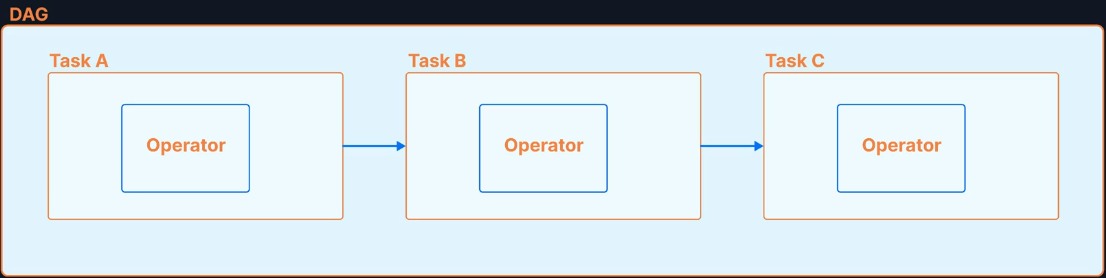

## **Arquitetura Geral do Apache Airflow**

**todos os componentes são aplicações python que podem serem feitas deploys de diversas maneiras**

os componentes são:

*   **dags**: pasta onde se encontram alocadas as DAGs e suas Tasks

*   **webserver**: responsável por facilitar via UI o monitoramento de DAGs e é executado na **porta 8080**. é um webserver rodado em Flask e GUnicorn no Airflow 2.0 e vai ser substituído por React no Airflow 3.0

*   **metadata database**: responsável por armazenar metadados das DAGs, tasks, usuários, XCom, conexões, variáveis, etc. geralmente é um RDBMS do tipo PostgreSQL, MySQL, SQLite, dentre outros. acompanha todo o processo de DAG run

*   **scheduler**: tem como função monitorar novas DAGs, serializar novas DAGs no metadata database, schedular pipelines (determinar qual e quando executar cada task), submeter Tasks ao executor e registrar na metadata database que uma DAG foi executada, bem como seu resultado

*   **executor**: um componente interno do scheduler e que tem como funcionalidade definir como e em qual sistema a task deve ser executada, por exemplo um cluster Kubernetes ou de modo local. podemos definir nosso proprio executor se necessário

*   **queue**: é interna ao executor e tem como papel definir a ordem de execução correta das tasks como especificado no pipeline. pode ser interna ou externa, dependendo do tipo de executor usado

*   **worker**: é o componente que recebem as tasks da queue e as executa. também tem como função registrar os resultados das tasks na metadata database após sua a conclusão de cada task. **numa arquitetura básica, se encontra interno ao Scheduler**

*   **triggerer**: tem como função fazer o gerenciamento de um tipo específico de operators denominados de deferrable operators

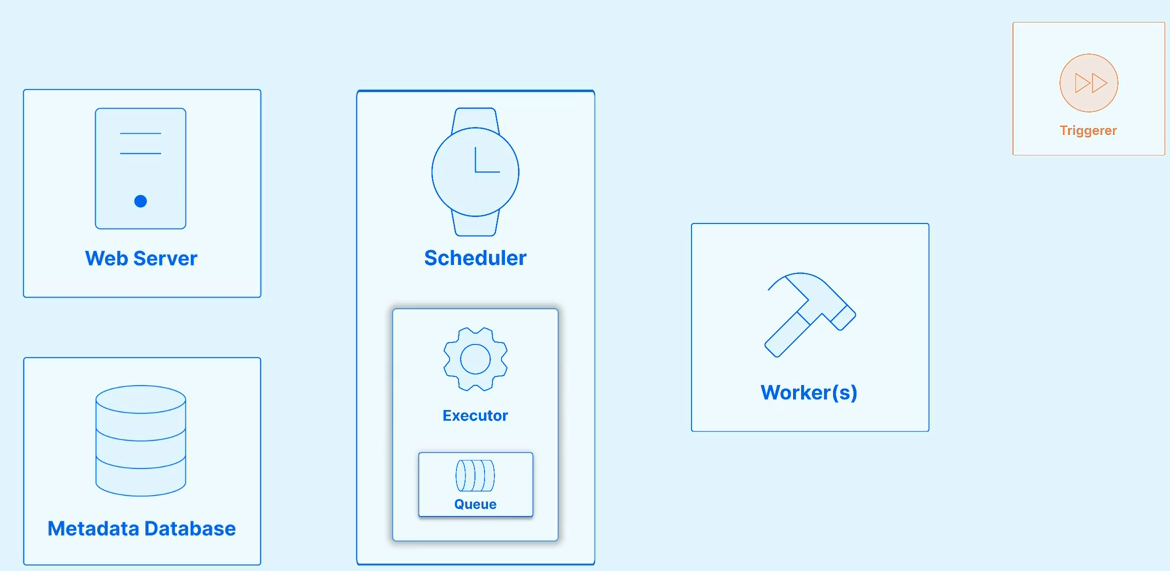

## **Fluxo de Processamento Geral de DAGs na Arquitetura do Apache Airflow**

as dags ficam organizadas por padrão numa pasta nomeada de **dags**

1.  o scheduler atua de modo contínuo scaneando a pasta dags (por padrão a cada 5 minutos) e, quando uma nova DAG é detectada, o scheduler faz a serialização e processamento desta nova DAG e a armazena no metadata database

2.  após o armazenamento no metadata database, o scheduler continua buscando DAGs que estão prontas para serem executadas a cada 5 segundos na metadata database

3.  quando detectadas DAGs prontas para execução, o scheduler passa suas tasks para a queue

4.  assim que um worker está disponível, a task é designada a ele com o intuito de ser executada

5.  após a execução, a metadata database é atualizada por componentes como os workers, scheduler e executor

6. por fim o webserver é atualizado pela metadata database permitindo o monitoramento das DAGs e processos do Apache Airflow

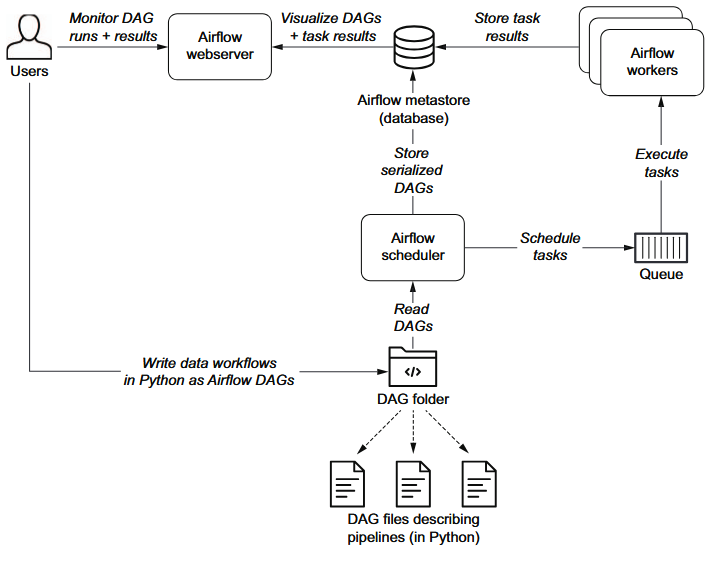

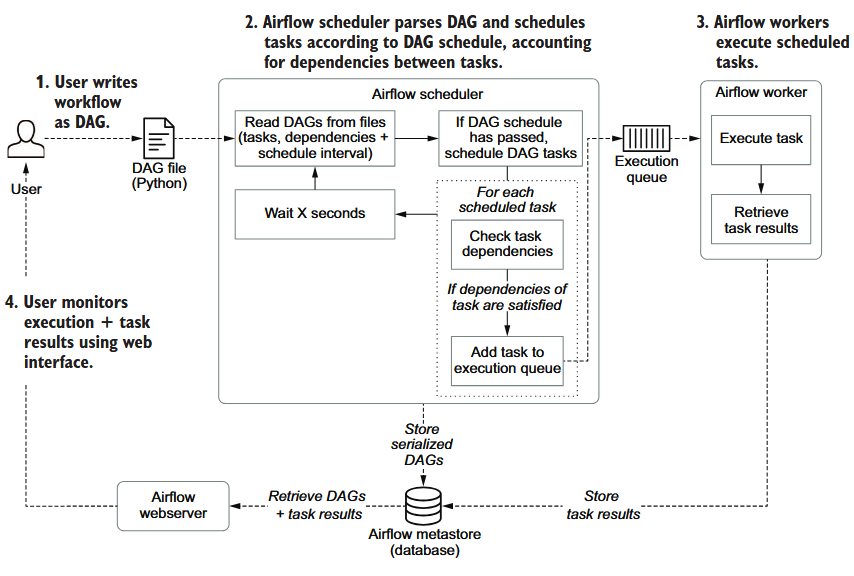

## **Arquitetura do Apache Airflow de Modo Aprofundado**

*   **triggerer**: executa deferred tasks via event loop do asyncio. quando deferred tasks não são necessárias, o triggerer também não é

*   **dag processor**: faz a análise e serialização de DAGs na metadata database de modo a evitar a sobrecarga do scheduler. por padrão faz parte do scheduler mas pode ser separado garantindo maior escalabilidade e segurança

*   **plugin**: pasta que permite estender a funcionalidade do Apache Airflow, análogo a pacotes python. os plugins são lidos pelo scheduler, dag processor, triggerer e webserver

## **Papéis de Usuários em Deploys do Apache Airflow**

quando executado de modo local, por padrão, o Apache Airflow gera somente um scheduler e um webserver

a separação de componentes provê maior segurança ao isolar seus componentes, possibilitando a performance de diferentes Tasks

apesar de poder ser feito o desenvolvimento do ecossistema Apache Airflow de modo local por um único usuário, seu deploy é mais complexo necessitando de papéis de usuário que interagem com uma parte específica do sistema, garantindo segurança, como por exemplo

*   **Deployment Manager**: responsável pela instalação, configuração e gerenciamento do deploy do Apache Airflow

*   **DAG Author**: responsável pela definição e escrita de DAGs e sua submissão no ecossistema do Apache Airflow

*   **Operation User**: responsável pelo engatilhamento de DAGs e Tasks e o monitoramento de sua execução

## **Deploy de Modelos de Apache Airflow**

os diagramas a seguir ilustram os modelos de deploy possíveis para um modelo de Apache Airflow

seus conectores, cores e estilos tem os seguintes significados:

*   **linhas sólidas e marrons**: representa a submissão e sincronização de arquivos de DAG 

*   **linhas sólidas e azuis**: representa o deploy e o acesso de pacotes e plugins instalados 

*   **linhas tracejadas e pretas**: representa o fluxo de controle dos workers pelo scheduler

*   **linhas sólidas e pretas**: representa acesso à UI para gerenciamento de workflows

*   **linhas tracejas e vermelhas**: representa o acesso à metadata database

### *Arquitetura Básica*

opera numa unica maquina

geralmente é usado o **`LocalExecutor`, que possui em sua estrutura o Scheduler e os Workers**

os arquivos na pasta `dags` é lido diretamente pelo Scheduler

o `Webserver` e o `Scheduler` são executados na mesma máquina

não há `Triggerer` assim, nessa situação, **não é possível o uso de deferred dags**

**os papéis dos usuários, no geral, não é segmentado, isto é, um único usuário performa as funçoes de DAG Author, Deployment Manager e Operation User**

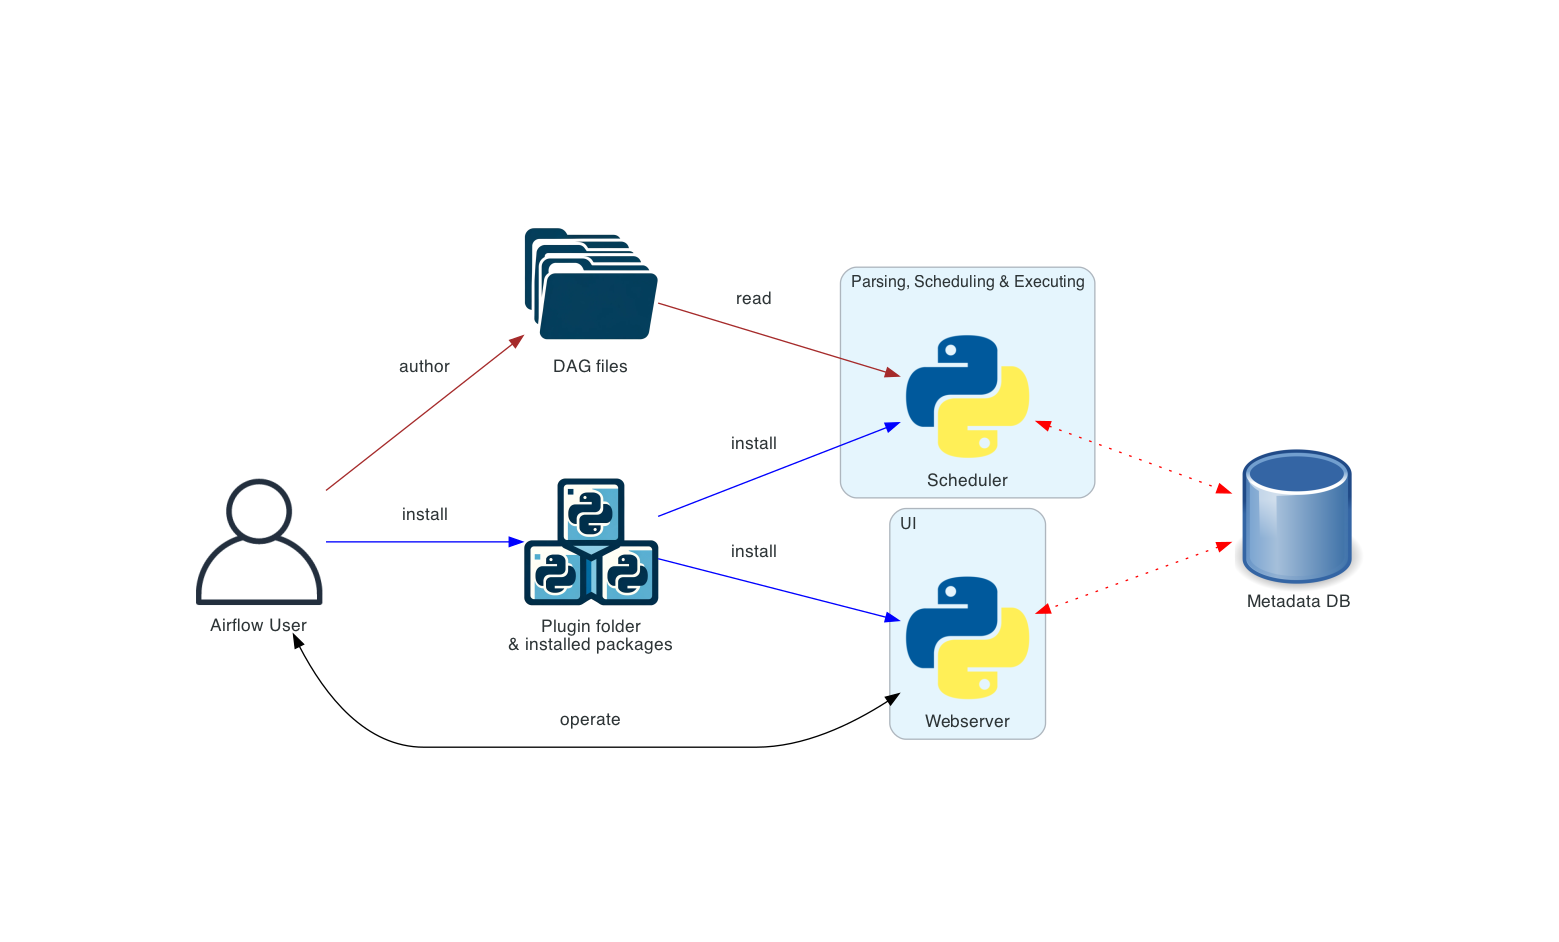

### *Arquitetura Distribuída*

os processos são distribuídos em multiplas maquinas

**aqui são segmentados os perfis de usuários (DAG Author, Deployment Manager e Operation User)**

**importante ficar atento com a segurança**

o Webserver nao tem acesso direto à pasta dags, as **DAGs são interpretadas e expostas no Webserver pelo Metadata database**

**o Webserver não pode executar nenhum código escrito pelo DAG author**

**somente plugins e pacotes instalados pelo Deployment manager podem ser executados diretamente pelo Webserver**

**Operation user somente tem acesso à UI e somente pode engatilhar Tasks, mas não criá-las** 

a pasta dags precisa estar sincronizada com o Scheduler, Triggerer e Workers e isso pode ser feito de diversos métodos

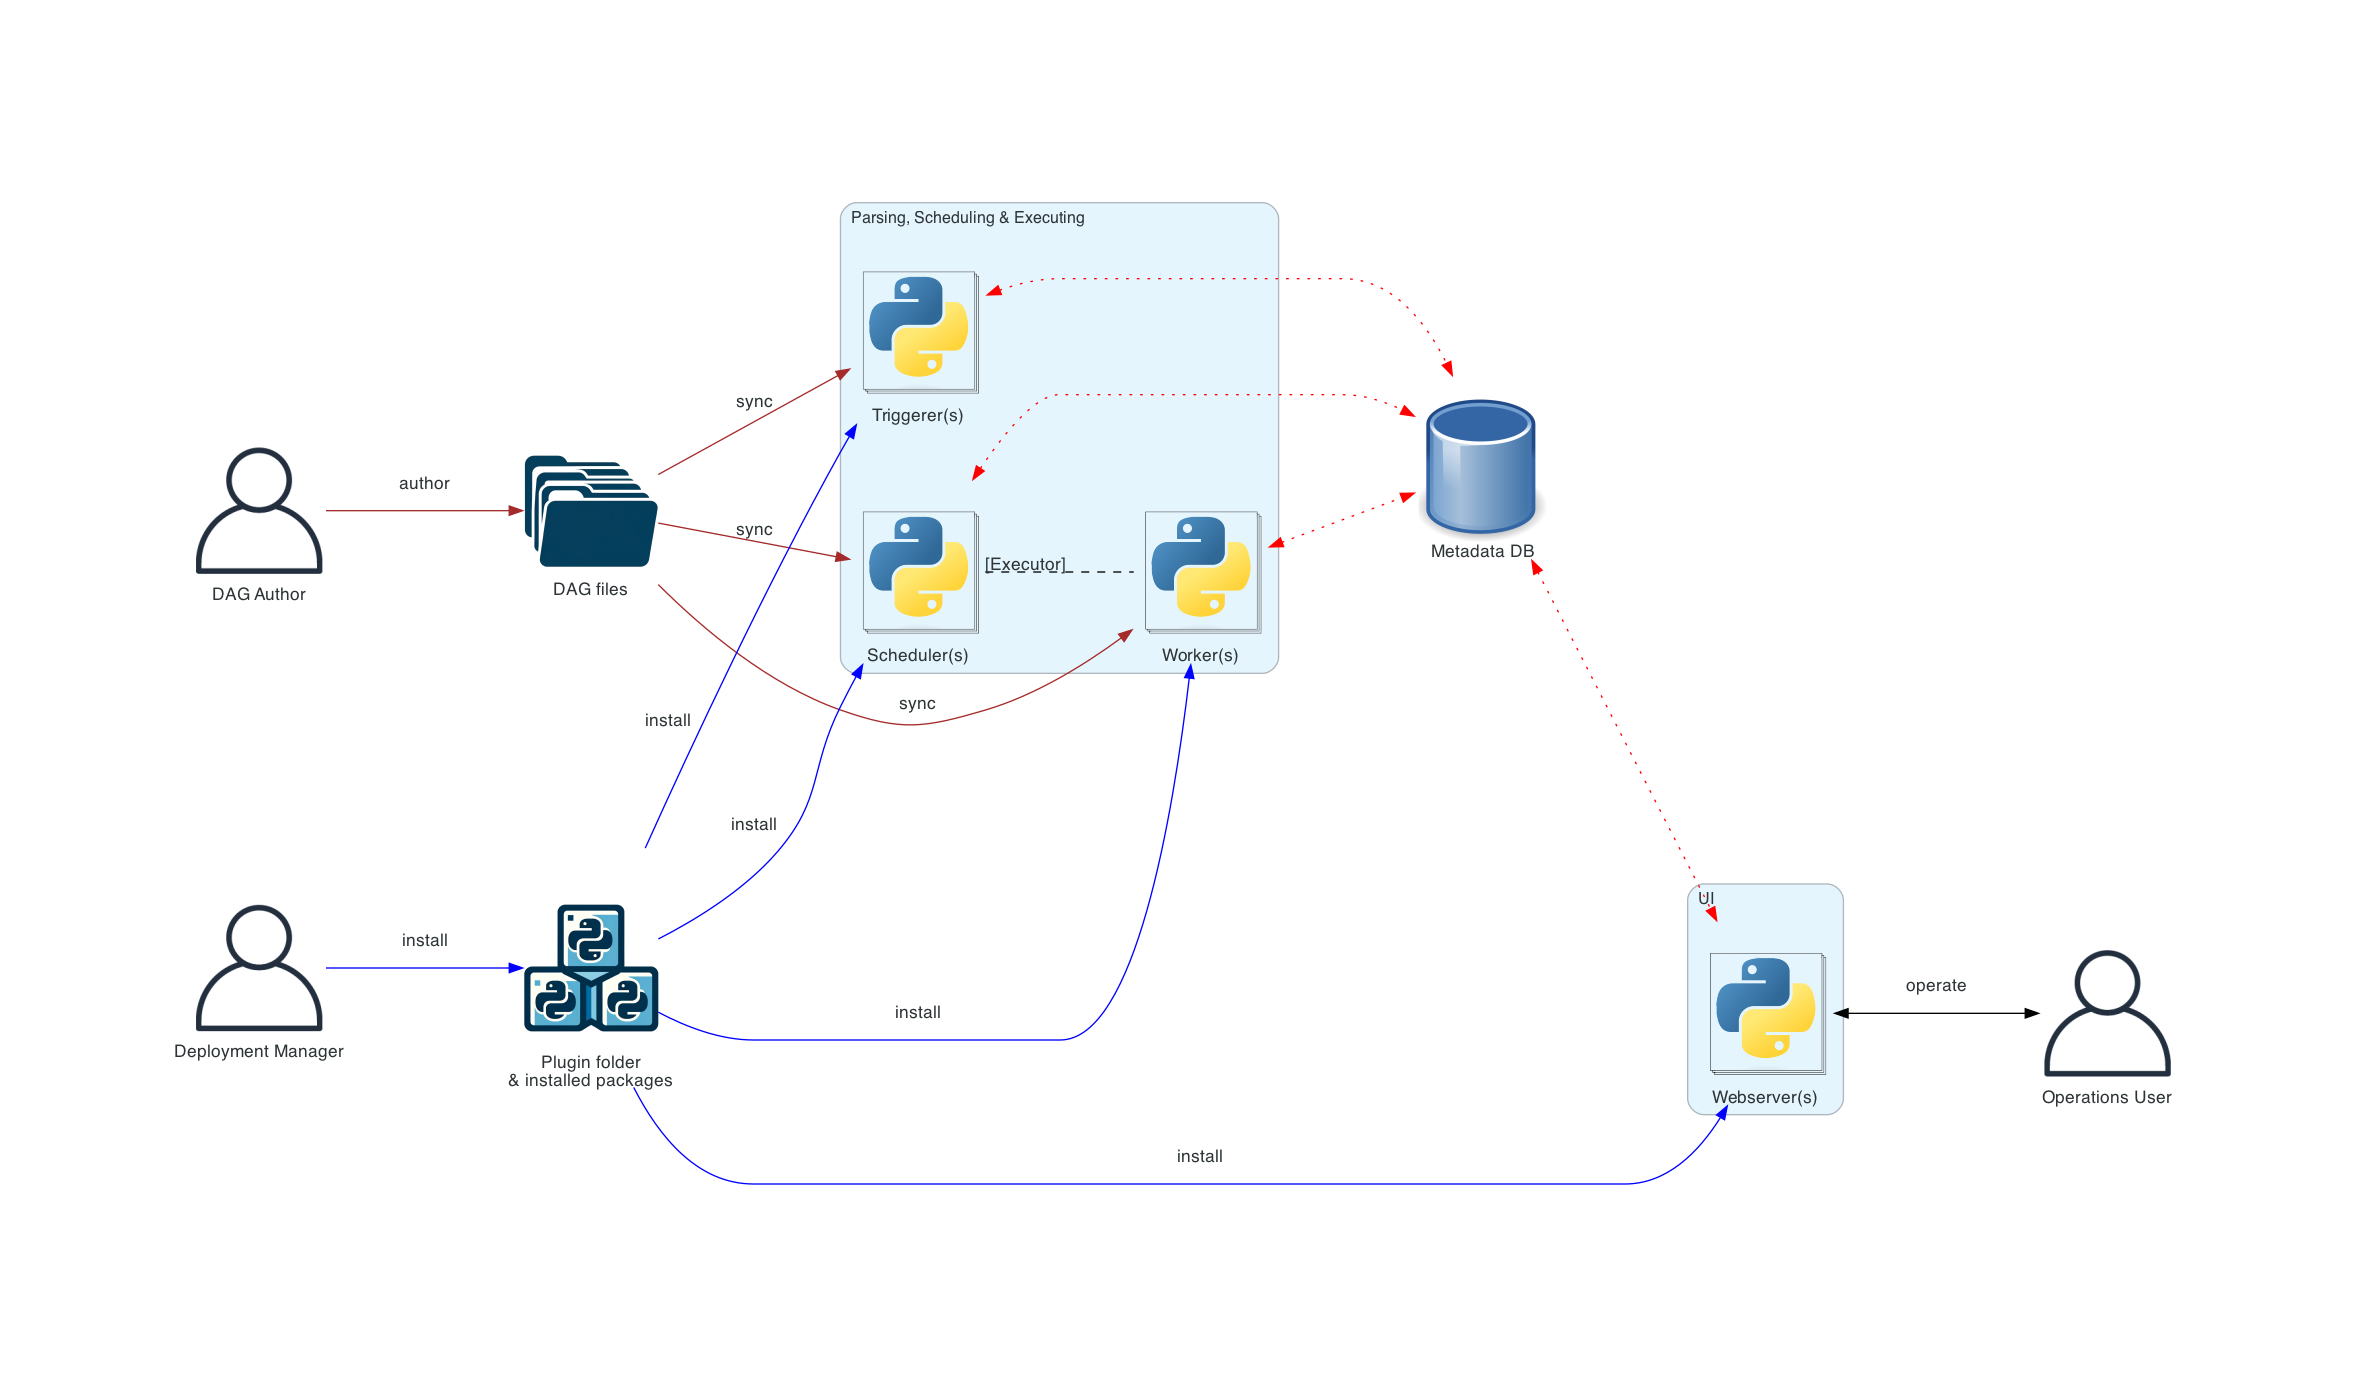

### *Arquitetura de Processamento de DAG Separada*

é o modelo mais complexo mas também o mais seguro se feito corretamente

aqui é usado o `Dag processor` separado do Scheduler

**garante que o código não é executado dentro de Scheduler**

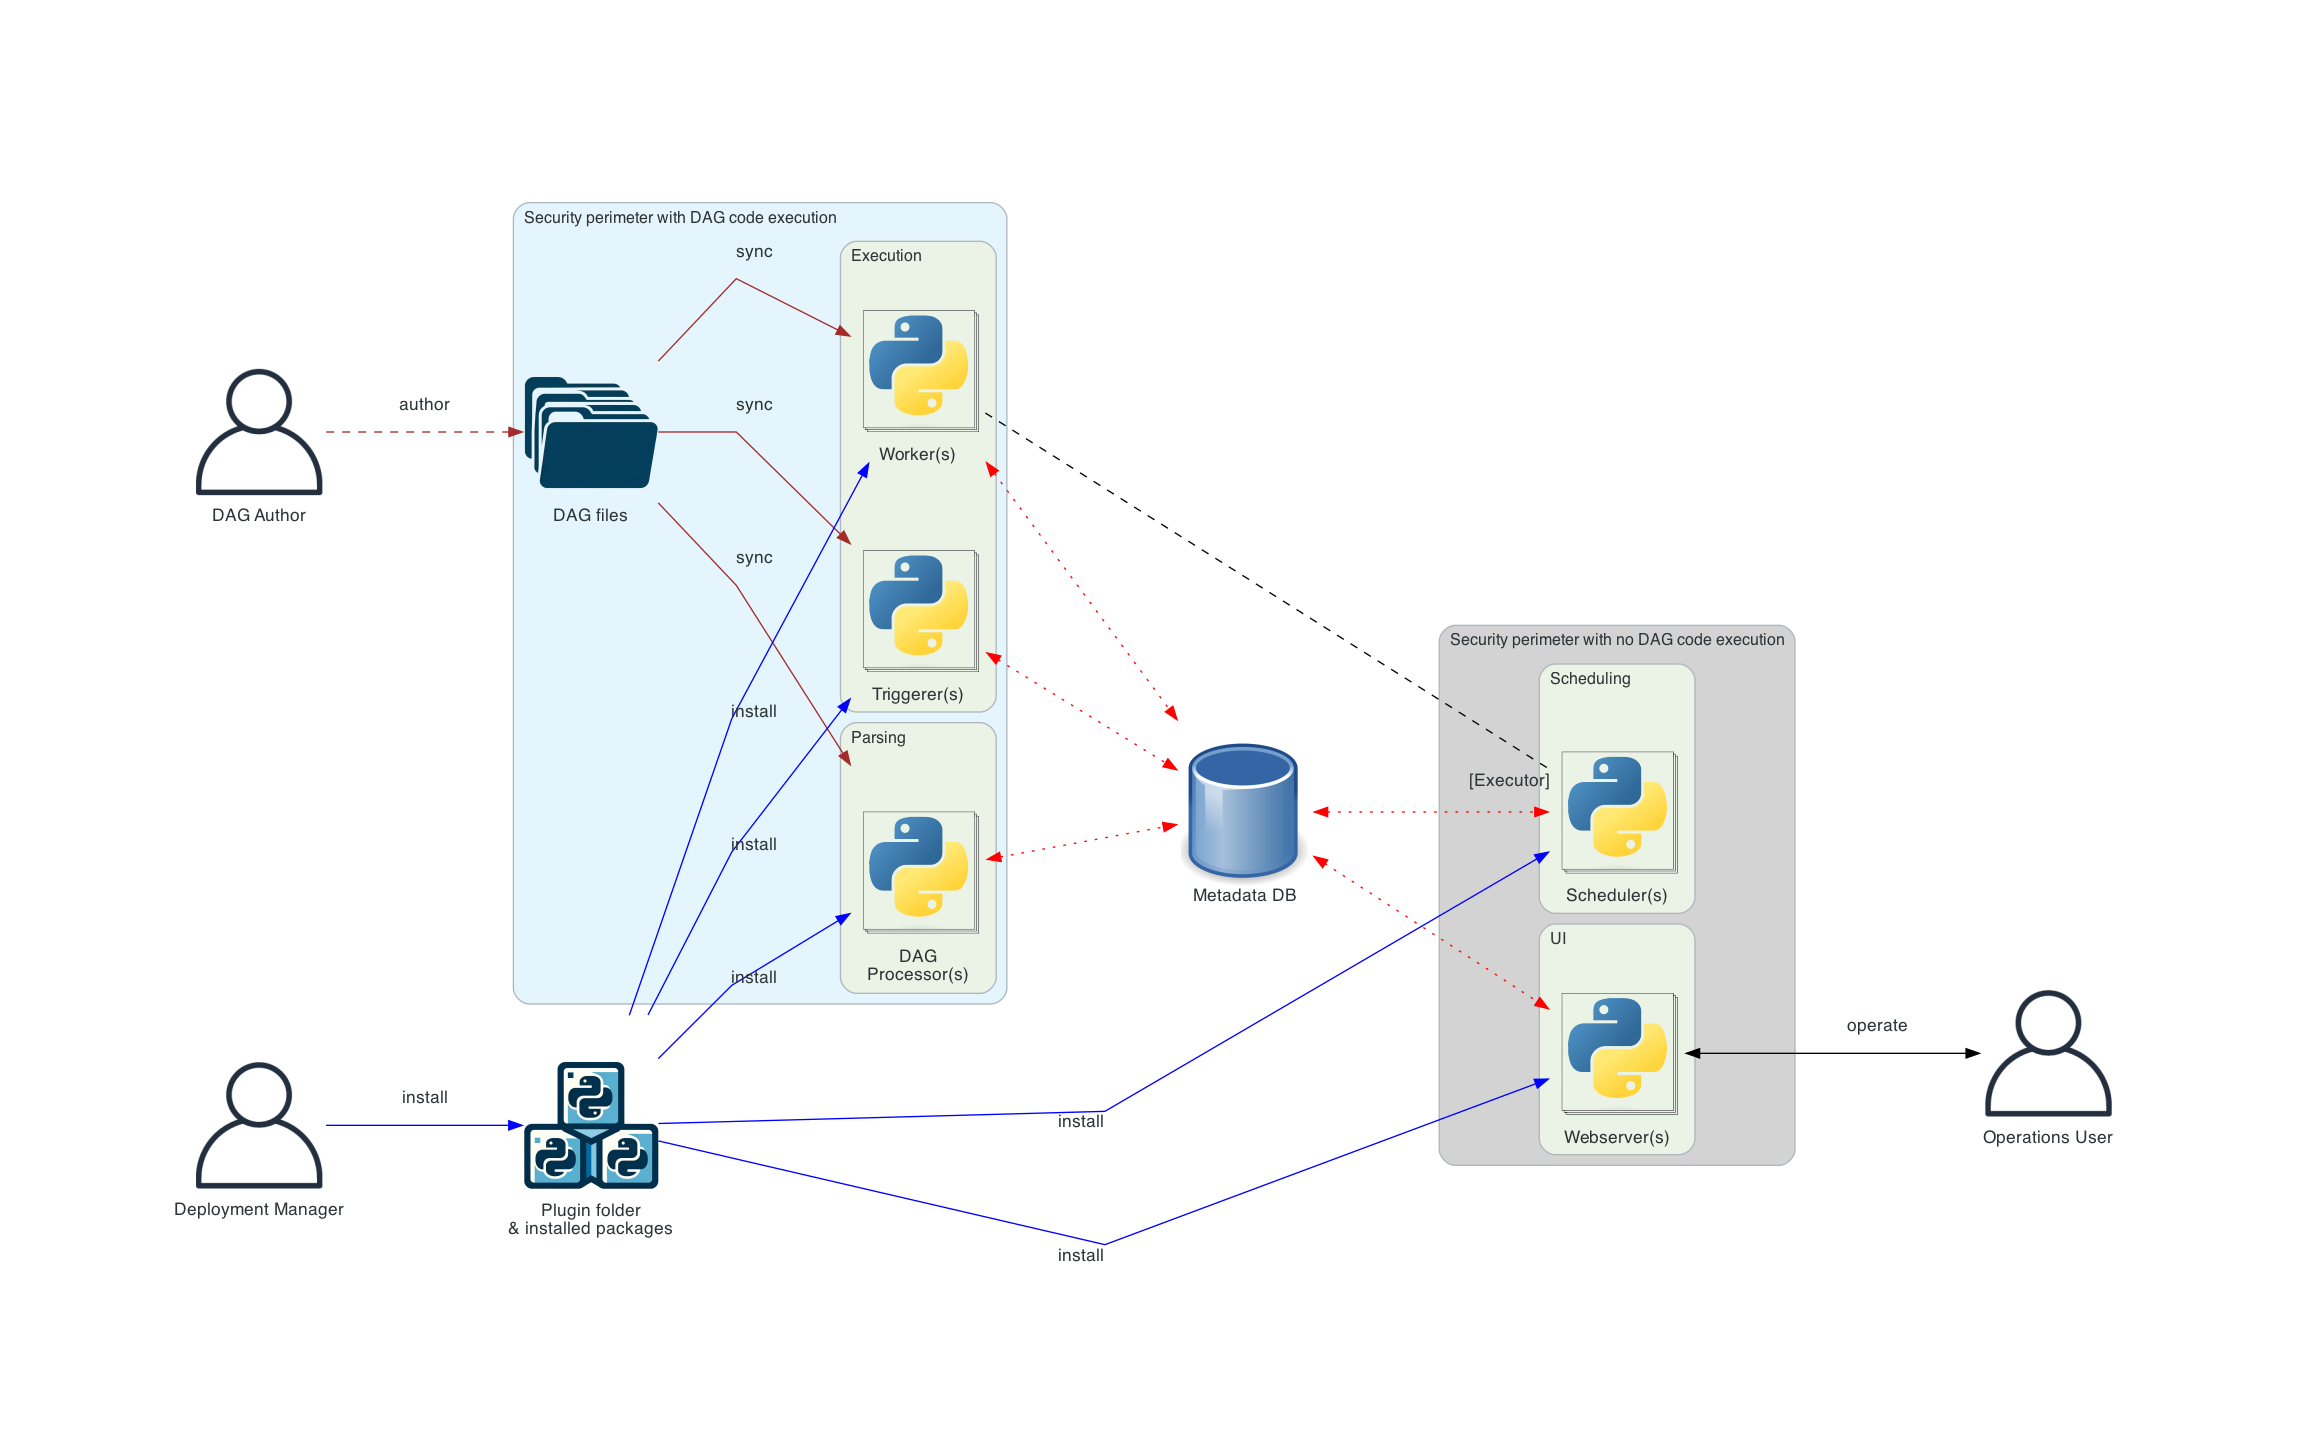

## **Backfilling**

**se trata da execução em datas passadas à atual mas maiores ou iguais à start_date**

### Limitações:

*   quantidade de recursos do Scheduler pode ser inferior à demandada, levando a erros e/ou falhas

*   pode consumir ostensivamente recursos para grandes gaps de tempo e/ou para tempos de schedule pequenos

*   **mudanças na estrutura da DAG e seu versionamento durante a execução de backfill pode levar a comportamentos inesperados. por exemplo, se novas tasks foram incrementadas após o intervalo de tempo de backfill, erros podem surgir devido à falta de dados de dependência**

*   **em situações onde houve quebra de uma task e houve a necessidade de se fazer o restart da mesma, o backfilling pode levar a erros e incosistências**

*   backfillings que são executados concomitantemente podem interferir um no outro levando a conflitos e problemas de scheduling

*   backfilling impacta na execução de DAGs "normais" dado que consome do Scheduler

*   problemas podem ser encontrados devido a disponibilidade de dados históricos

*   pode encontrar problemas com recursos externos acerca de como é disponibilizado o acesso a esses dados e suas limitações de acessos

*   DAGs com muitas dependências pode ser dificil de gerenciar e debugar

*   dependências circulares podem fazer com que DAGs falhem ou entrem num loop infinito, consumindo completamente o Scheduler levando a erro

# Apache Airflow - Aspectos Práticos

## **Directed-Acyclic Graph (DAG)**

fazendo o import

In [1]:
from airflow import DAG
from airflow.decorators import dag

criando a DAG

In [13]:
from datetime import datetime
with DAG(start_date=datetime.now(), 
         dag_id='primeira_dag', 
         description='teste de definição de dag não realiza nada num primeiro momento', 
         schedule='@daily'):
    pass

podemos atribuir parâmetros constantes para tasks usando o kwarg de DAG **default_args** que aceita um dicionário onde as chaves são os kwargs de tasks e os valores os valores que seriam passados àquela kwarg. **esses valores podem ser sobrescritos nas tasks ao fornecer outro valor ao kwarg presente em default_args**

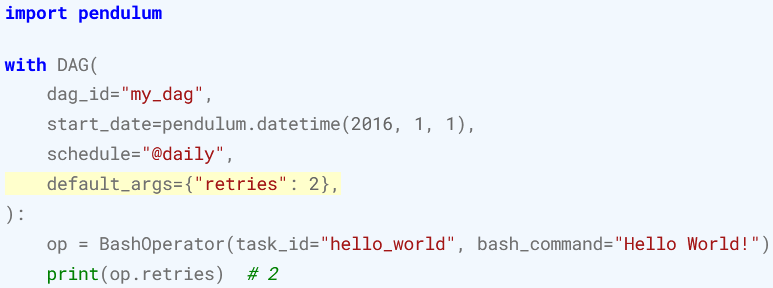

o processo definido como catchup é expresso pelo kwarg **catchup=True e via CLI**. **quando False ele executa a ultima run da DAG antes de pausar**

os tipos de intervalos aceitos para o kwarg **schedule=** são os seguintes:

*   **None** = é usada para fazer trigger com base em eventos e não em datas

*   **@once** = é executada somente uma única vez

*   **@hourly** = é executada a cada hora cheia, equivalente em CRON a 0 * * * *

*   **@daily** = performa todo dia à meia noite, equivalente em CRON a 0 0 * *

*   **@weekly** = performa todo dia no inicio da semana contando como dia de inicio de semana o domingo e manhã, equivalente em CRON a 0 0 * * 0

*   **@monthly** = performa todo inicio de mês no dia 1, equivalente em CRON a 0 0 1 * *

*   **@quarterly** = performa todo inicio de trimestre à meia noite do primeiro dia do trimestre, equivalente em CRON a 0 0 1 */3 *

*   **@yearly** = performa todo inicio de ano à meia noite do primeiro dia do ano, equivalente em CRON a 0 0 1 1 *

**a notação em CRON segue o seguinte padrão e provê maior flexibilidade no schedule de DAGs:**

**minutos horas dia-do-mes mes dia-da-semana [ano]**

minutos aceita valores no intervalo 0-59, é permitido o uso dos seguintes caracteres especiais [,-*/]

horas aceitam valores no intervalo 0-23, é permitido o uso dos seguintes caracteres especiais [,-*/]

dia-do-mes aceita valores no intervalo 1-31, é permitido o uso dos seguintes caracteres especiais [,-*/?LWC]

mes aceita valores em dois tipos de intervalo 1-12 ou JAN-DEC, é permitido o uso dos seguintes caracteres especiais [,-*/]

dia-da-semana aceita valores em dois tipos de intervalo 1-7 ou SUN-SAT, é permitido o uso dos seguintes caracteres especiais [,-*/LC#]

ano é opcional mas aceita valores de 1979-2099, é permitido o uso dos seguintes caracteres especiais [,-*/]

alguns exemplos de CRON podem ser ilustrados abaixo:

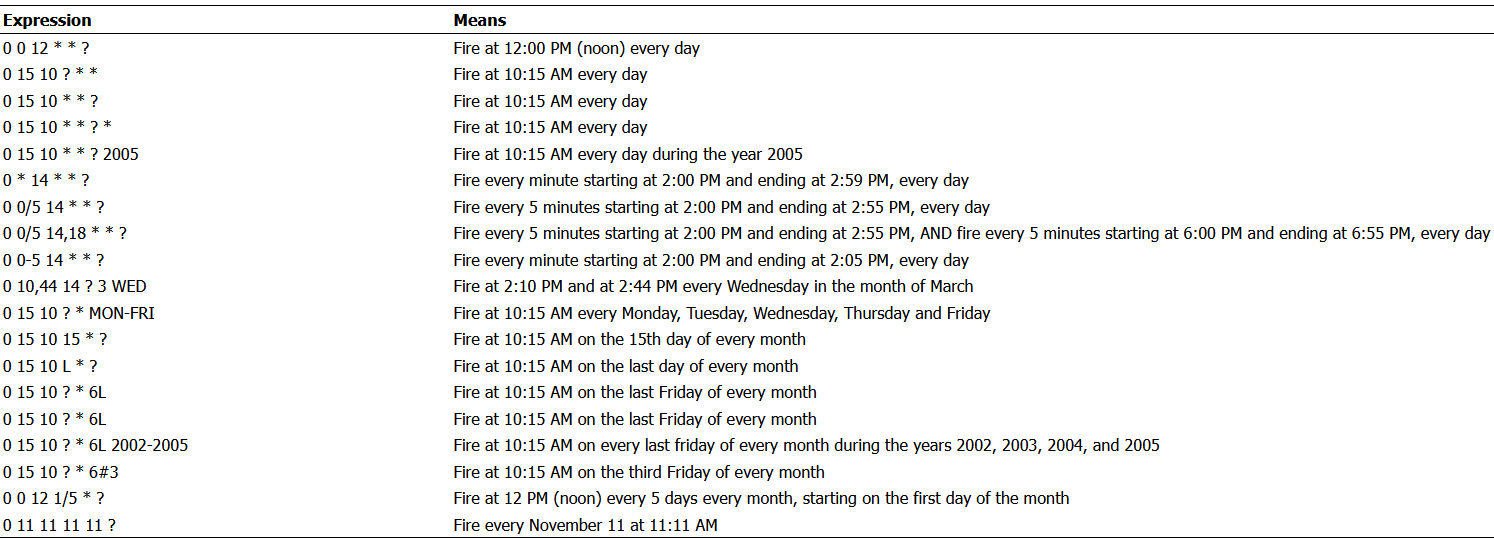

uma problemática com o CRON é que, se o tempo definido for a cada 3 dias, por exemplo, no dia 31 de um dado mês não será contabilizado para o mês seguinte. uma forma de se contornar esse erro inesperado é o uso de **timedelta objects**

DAGs definidas usando TaskflowAPI podem ter seus valores acessados usando a notação Jinja `{{ context.params }}`, assim, parametros definido na função decorada por `@dag` tem como nomenclatura padrão Jinja **context**

*   ****
kwargs

(kwargs com * são recomendados sempre serem usados na definição de DAGs)

*   ***dag_id:str=''** identificador unico da DAG, caso exista mais de uma DAG com o mesmo dag_id a seleção de qual será executada será feita de modo aleatório, mas sem retornar erros

*   ***schedule:Optional[str, None]=None** define a frequencia de execução da DAG. pode ser CRON ou valores previamente estabelecidos pelo Airflow listados acima

*   ***start_date:Optional[datetime]=None** define a data de inicio de operação da DAG. apesar de opcional, **se ausente, devemos fornecer para cada task/operator uma start_date**

*   **end_date:Optional[datetime]=** define a data final que a dag ira rodar

*   ***tags:Optional[List[str]]=None** permite filtrar via UI as DAGs de modo mais ágil

*   **description:Optional[str, None]=None** torna mais intuitivo o que a DAG performa

*   ***catchup:bool=True** se True faz com que DAG Runs anteriores que não foram executadas, sejam

*   **default_args:Optional[Dict[str,str]]=None** torna menos repetitivo parâmetros que são constantemente usados ao longo das tasks

*   **timetable:Optional[Timetable]=None** permite restringir intervalos de tempo do schedule=, selecionando somente dias uteis por exemplo. `airflow.timetables.base.Timetable`

*   **template_search_path:Optional[Union[str,list[str]]]=** define o caminho absoluto da pasta onde será feita a busca pelas variáveis a serem usadas na notação Jinja. a ordem importa e por padrão a pasta designada é a `dags`

*   **user_defined_macros:dict=** um dicionário customizável que permite ao usuario definir como seus macros serão expostos na notação Jinja. por exemplo, para acessar o valor da variável foo segue-se da seguinte maneira: `dict(foo='bar')` se torna `{{ foo }}` na notação Jinja em qualquer template relacionado a esta DAG

*   **user_defined_filters:dict=** é um dicionário de filtros no formato Jinja que pode ser usado nos templates da DAG em questão. permite atribuir valores de acordo com a situação de interesse ao valor da variável usada, análogo à f-strings. segue o seguinte padrão de definição: `dict(hello=lambda name: 'Hello %s' % name)`, desse modo podemos passar um valor específico da variável name da seguinte forma `{{ 'Victor' | hello }}`

*   **params:dict=** 

*   **max_active_tasks:int=** determina quantas tasks podem estar ativas na present DAG de modo concorrente

*   **max_active_runs:int=** determina quantas instancias de DAGs de uma dada DAG pode estar sendo executada paralelamente. se o numero de DAG Runs em paralelo for superior a esse numero, o Scheduler não permite a execução

*   ***dagrun_timeout:datetime.timedelta=** determina o tempo máximo de execução de uma DAG. caso o tempo de execução ultrapasse o valor dado, ele retornará um erro, permitindo a criação de novas DAG Runs. **esse parâmetro é somente usado em Dag Runs que são agendadas via tempo**. **util para minimizar sobrecarga do Scheduler, Workers, Executors e Queue**

*   **sla_miss_callback:callable=** executa a função quando reportado um timeout SLA

*   **default_view:str='tree'** especifica o modelo de visualização da DAG `('tree', 'graph', 'duration', 'gantt', 'landing_times')`

*   **orientation:str='LR'** especifica o modo como é visualizado no grafo a DAG `('LR', 'TB', 'RL', 'BT')`

*   **on_failure_callback:callable=** uma função que é acionada após a falha da DAG

*   **on_success_callback:callable=** uma função que é executada após uma DAG Run de sucesso

*   **access_control:dict=** permite especificar o controle e permissão dos usuários para esta DAG

*   **is_paused_upon_creation:Optional[bool, None]=** determina se após a criação a DAG deve permanecer pausada. se a DAG já existir esse kwarg será ignorado. caso não seja especificado, o valor usado será o global das configurações do Apache Airflow

*   **jinja_environment_kwargs:dict=** permite configurar o template Jinja de modo customizado

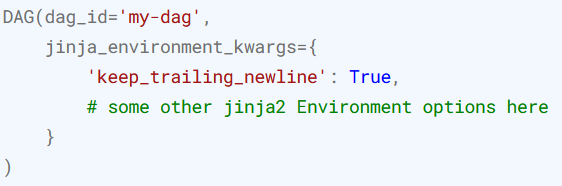

*   **render_templates_as_native_obj:bool=** se True usa o `NativeEnvironment` do Jinja para renderizar templates como tipos Python nativos, caso contrário um Jinja `Environment` é usado para renderizar os templates no formato de string

*   **file_loc:str=** caminho absoluto que precisa ser importado para o carregamento da DAG

## **.airflowignore**

presente dentro da pasta `dags`

faz com que os nomes dos arquivos aqui presentes sejam ignorados pelo scheduler/dag processor

## **Operators**

In [14]:
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator


**a ordem dos operadores é determinada por >> ou << esta etapa é denominada de dependências**

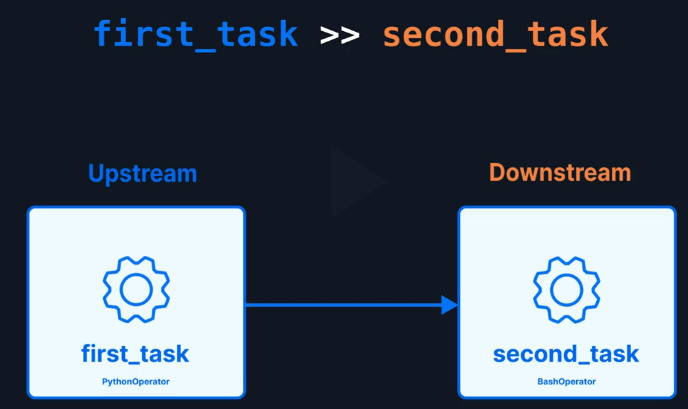

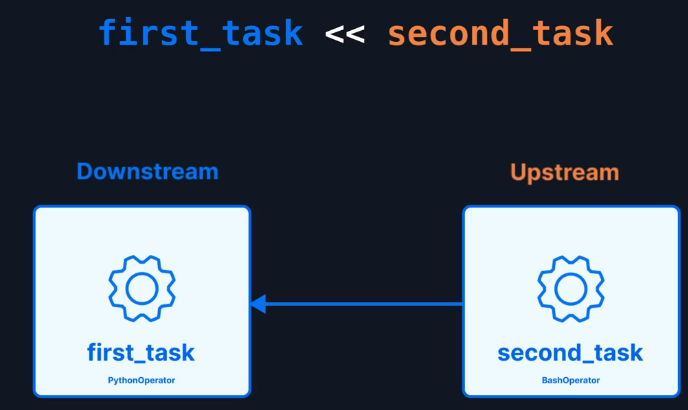

*   ****
### PythonOperator 

kwargs:

*   **task_id=** id unico da task

*   **python_callable=** função a ser executada por este operador

*   **op_args=None** uma lista de argumentos que serão desempacotadas e passadas ao python_callable

*   **op_kwargs=None** um dicionário de argumentos que serão desempacotadas e passadas ao python_callable

*   **show_return_value_in_logs=True** permite mostrar ou nao o output no log. é recomendado não usá-lo em situação de transmissão de dados com XCOM para TaskFlowAPI

*   **templates_dict=**

*   **templates_exts=**

## **Tasks**

**quando adotada a notação TaskflowAPI para definição de tasks, podemos usar `{{ context.params }}` para acessar variáveis definidas na função decorada por `@dag`**

**tasks tem como característica serem idempontentes e deterministicas**

*   **deterministica** = para o mesmo input o mesmo output é gerado, sempre

*   **idempotente** = se executada varias vezes o mesmo efeito colateral é gerado

exemplo determinístico mas não idempotente pois, retorna erro numa segunda execução, já que a pasta foi criada na primeira vez

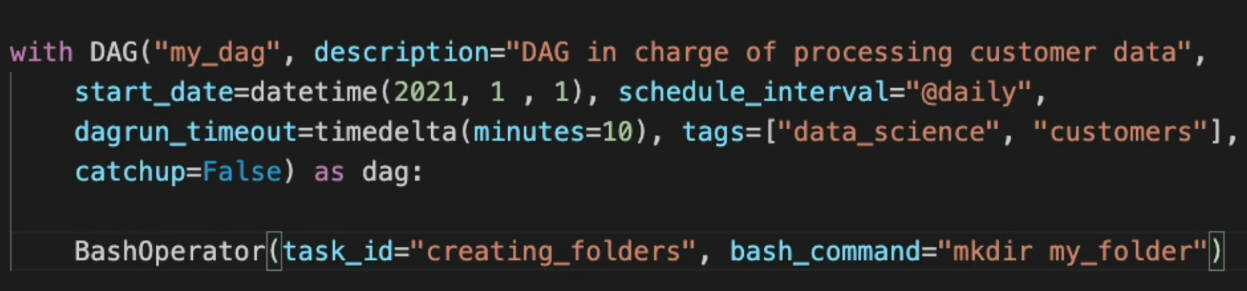

exemplo determinítico E idempotente:

In [ ]:
from airflow.decorators import task, dag
from datetime import datetime, timedelta


@dag(
    dag_id='idempotent_and_deterministic',
    schedule=timedelta(minutes=10),
    dagrun_timeout=timedelta(minutes=5),
    catchup=False,
    tags=['deterministic', 'idempotent', 'test'],
    description='mostrando como funciona uma task deterministica e idempotente'
)
def deterministic():


    @task.bash
    def bash_op():
        return 'mkdir -p folder' # previne erro caso a pasta exista previamente
    
    
    bash_op()


deterministic()

## **Task Group**

**grupos podem ser utilizados ao passar dependências, tornando a linguagem menos verbosa e o grafo mais claro**

**outro benefício são os métodos que o Task Group carrega consigo, tornando algumas operações que antes complexas, em mais simples**

são criados a partir de **`@task_group`**

*   ****
kwargs

*   **group_id:Optional[str]=None** é o identificador do Task Group

*   **prefix_group_id:bool=True** permite o uso automatico de prefixos nas tasks para referenciação, **por padrão é o nome do Task Group**

*   **parent_group:Optional[TaskGroup]=None** 

*   **dag:Optional[DAG]=None**

*   **default_args:Optional[dict[str,Any]]=None** permite passar valores constantes evitando repetição desnecessária. os valores se especificados nas Tasks serão sobrepostos

*   **tooltip:str=''** permite sobrescrever a docstring da função ele decora, fazendo com que na UI essa descrição seja mostrada e não a da docstring

*   **ui_color:str='CornflowerBlue'**

*   **ui_fgcolor:str='#000'**

*   **add_suffix_on_colision:bool=False** permite o uso automatico de sufixos nas tasks para referenciação, **por padrão é o nome do Task Group**

In [ ]:
import datetime

from airflow import DAG
from airflow.decorators import task_group
from airflow.operators.bash import BashOperator
from airflow.operators.empty import EmptyOperator

with DAG(
    dag_id="dag1",
    start_date=datetime.datetime(2016, 1, 1),
    schedule="@daily",
    default_args={"retries": 1},
):

    @task_group(default_args={"retries": 3}, task_group='primeiro_tg')
    def group1():
        """This docstring will become the tooltip for the TaskGroup."""
        task1 = EmptyOperator(task_id="task1")
        task2 = BashOperator(task_id="task2", bash_command="echo Hello World!", retries=2)
        print(task1.retries)  # 3
        print(task2.retries)  # 2

In [ ]:
from airflow.decorators import dag, task, task_group
from datetime import timedelta, datetime

default_args = {
    'retries':3
}


@dag(
    dag_id='task_grouo_test',
    catchup=False,
    start_date=datetime(2024, 1, 1),
    max_active_runs=2,
    schedule=timedelta(days=1),
    tags=['task group', 'test'],
    default_args=default_args
)
def teste_dag():

    default_args_tg = {
        'retries':2
    }

    @task_group(
        group_id='primeiro_tg',
        tooltip='usado para somente fins didaticos',
        default_args=default_args_tg
    )
    def tg():
        
        @task
        def task1():
            return None
        
        @task
        def task2():
            return None
        
        task1() >> task2()

    @task
    def task_out_group():
        return None

    tg() >> task_out_group()


teste_dag()

In [ ]:
from airflow.utils.task_group import TaskGroup

with TaskGroup(
    group_id="task_group_2",
    default_args={"conn_id": "postgres_default"},
    tooltip="This task group is also very important!",
    prefix_group_id=True,
    # parent_group=None,
    # dag=None,
    # add_suffix_on_collision=True, # resolves group_id collisions by adding a suffix
) as tg2:
    t1 = EmptyOperator(task_id="t1")

tomando o primeiro Task Group para análise temos:

*   a referência para task1 é `primeiro_tg.task1` dado que `preffix_group=True`

*   podemos observar que os valores passados em `default_args` podem ser acessados via dot notation, como atributos da Task

tomando o segundo Task Group para análise temos:

*   `tooltip=` é especificado, realizando a documentação do Task Group

um grafo genérico contendo Task Group pode ser observado a seguir seguido do código que o gera

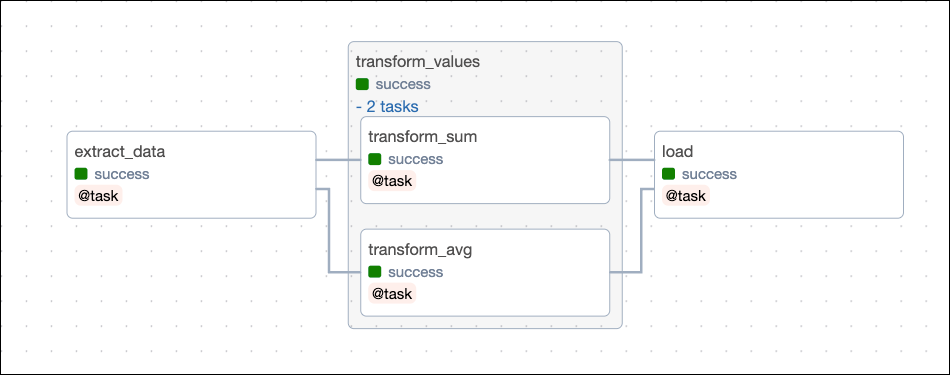

In [1]:
from airflow.decorators import dag, task, task_group
from pendulum import datetime
import json


@dag(start_date=datetime(2023, 8, 1), schedule=None, catchup=False)
def task_group_example():
    @task
    def extract_data():
        data_string = '{"1001": 301.27, "1002": 433.21, "1003": 502.22}'
        order_data_dict = json.loads(data_string)
        return order_data_dict

    @task
    def transform_sum(order_data_dict: dict):
        total_order_value = 0
        for value in order_data_dict.values():
            total_order_value += value

        return {"total_order_value": total_order_value}

    @task
    def transform_avg(order_data_dict: dict):
        total_order_value = 0
        for value in order_data_dict.values():
            total_order_value += value
            avg_order_value = total_order_value / len(order_data_dict)

        return {"avg_order_value": avg_order_value}

    @task_group
    def transform_values(order_data_dict):
        return {
            "avg": transform_avg(order_data_dict),
            "total": transform_sum(order_data_dict),
        }

    @task
    def load(order_values: dict):
        print(
            f"""Total order value is: {order_values['total']['total_order_value']:.2f} 
            and average order value is: {order_values['avg']['avg_order_value']:.2f}"""
        )

    load(transform_values(extract_data()))


task_group_example()

<DAG: task_group_example>

Task Groups podem ser aninhados em diversos niveis fazendo o código mais complexo porém, com grafo mais ordenado e claro

In [ ]:
groups = []
for g_id in range(1,3):
    @task_group(group_id=f"group{g_id}")
    def tg1():
        t1 = EmptyOperator(task_id="task1")
        t2 = EmptyOperator(task_id="task2")

        sub_groups = []
        for s_id in range(1,3):
            @task_group(group_id=f"sub_group{s_id}")
            def tg2():
                st1 = EmptyOperator(task_id="task1")
                st2 = EmptyOperator(task_id="task2")

                st1 >> st2
            sub_groups.append(tg2())

        t1 >> sub_groups >> t2
    groups.append(tg1())

groups[0] >> groups[1]

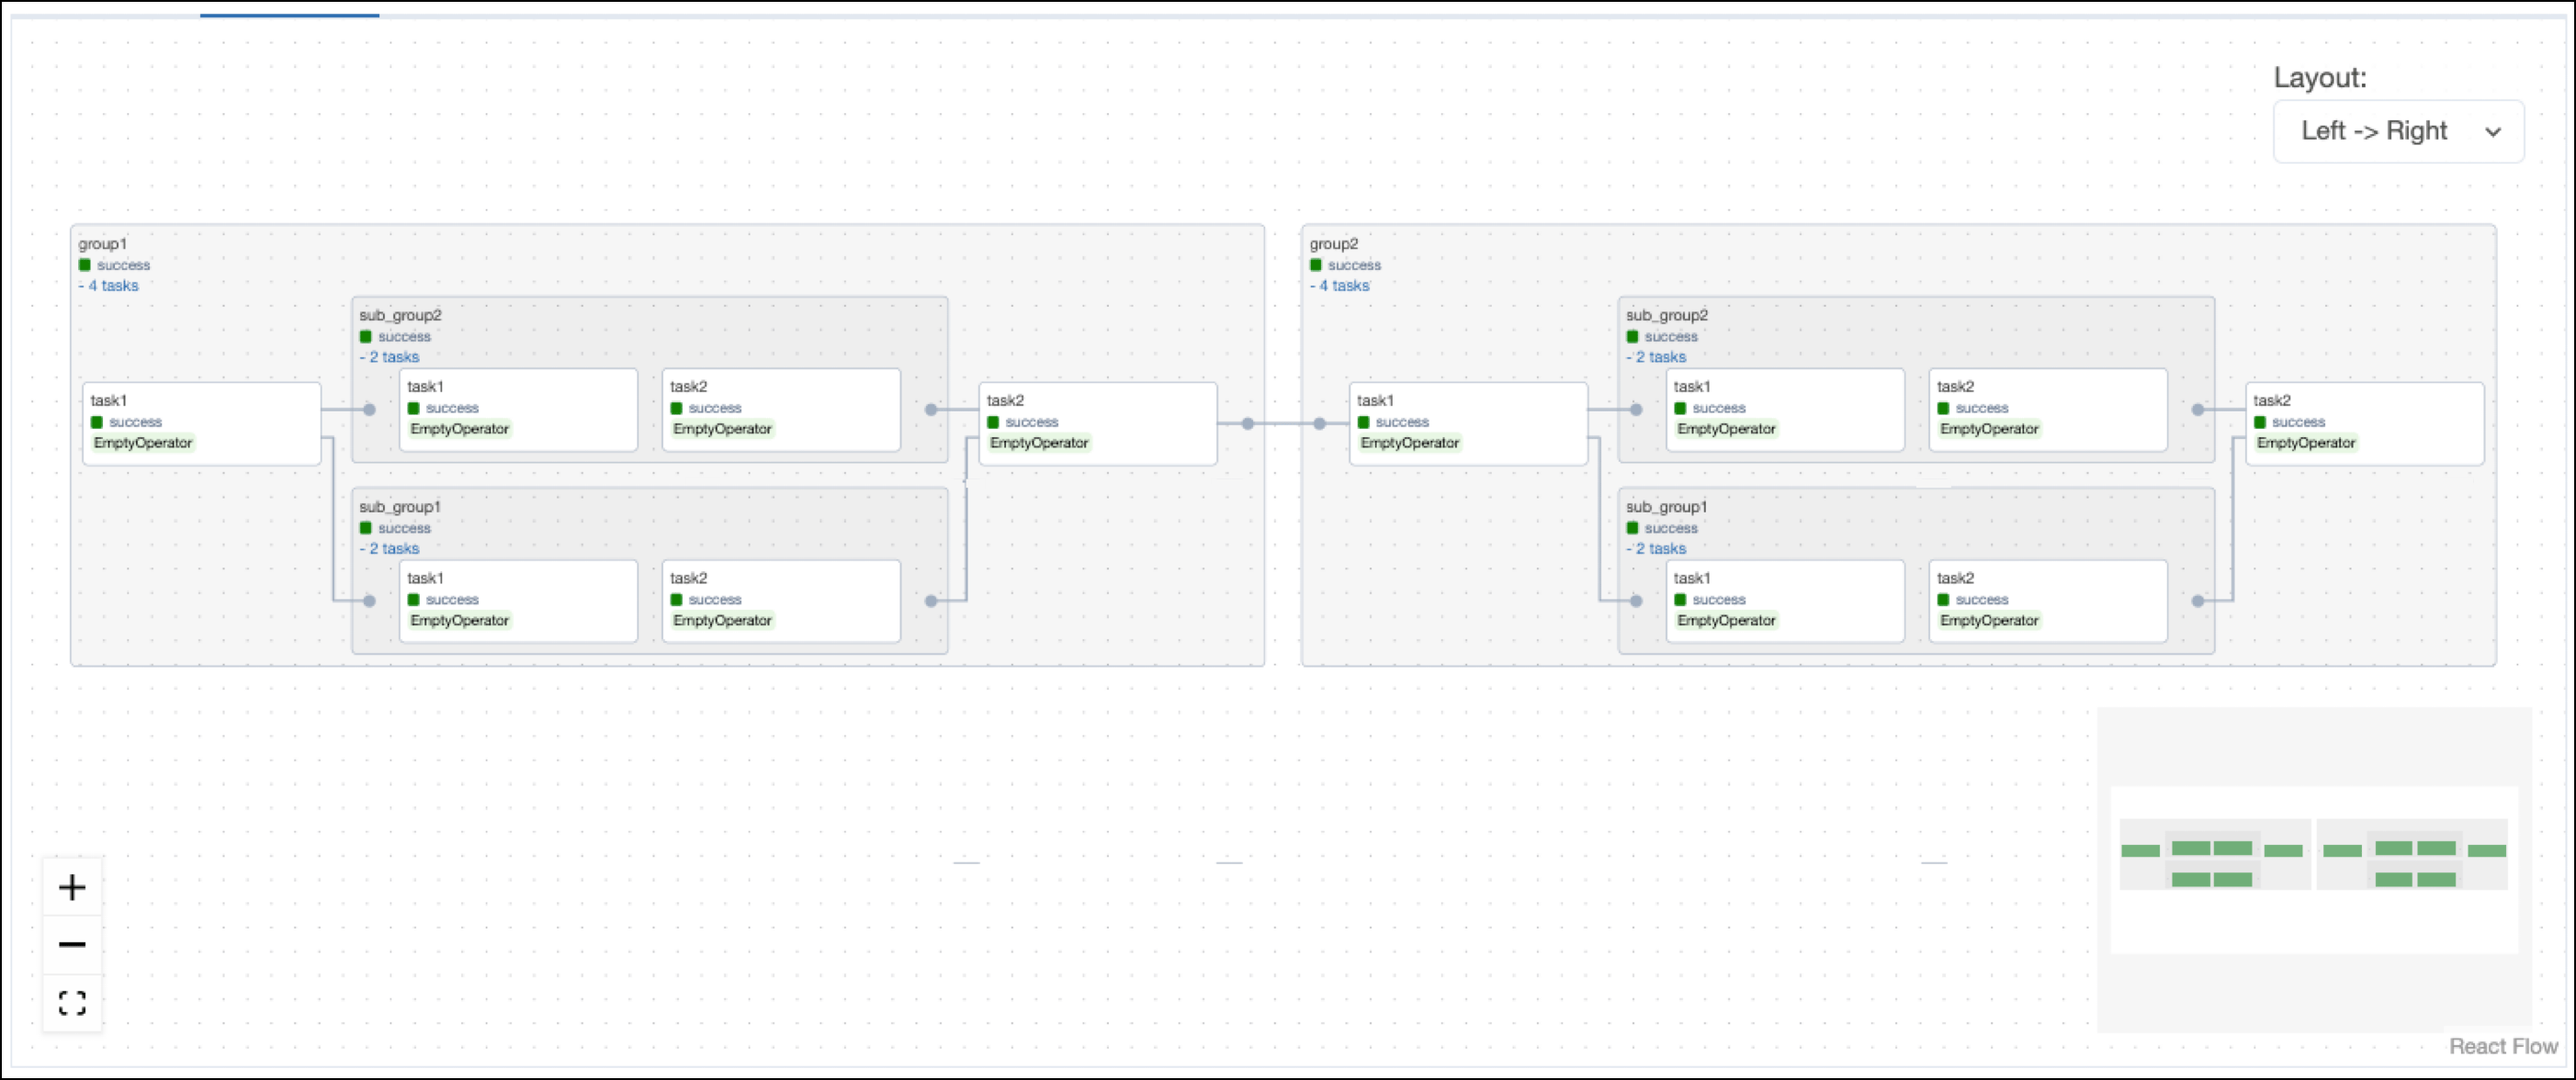

podemos transmitir dados de um Task Group para outra Task/Task Group da mesma maneira que realizada com Tasks

In [ ]:
from airflow.decorators import dag, task, task_group
from pendulum import datetime
import json


@dag(start_date=datetime(2023, 8, 1), schedule=None, catchup=False)
def task_group_example():
    @task
    def extract_data():
        data_string = '{"1001": 301.27, "1002": 433.21, "1003": 502.22}'
        order_data_dict = json.loads(data_string)
        return order_data_dict

    @task
    def transform_sum(order_data_dict: dict):
        total_order_value = 0
        for value in order_data_dict.values():
            total_order_value += value

        return {"total_order_value": total_order_value}

    @task
    def transform_avg(order_data_dict: dict):
        total_order_value = 0
        for value in order_data_dict.values():
            total_order_value += value
            avg_order_value = total_order_value / len(order_data_dict)

        return {"avg_order_value": avg_order_value}

    @task_group
    def transform_values(order_data_dict):
        return {
            "avg": transform_avg(order_data_dict),
            "total": transform_sum(order_data_dict),
        }

    @task
    def load(order_values: dict):
        print(
            f"""Total order value is: {order_values['total']['total_order_value']:.2f} 
            and average order value is: {order_values['avg']['avg_order_value']:.2f}"""
        )

    load(transform_values(extract_data()))


task_group_example()

podemos criar um Task Group próprio evitando repetição em processos comuns. isso pode ser feito da seguinte maneira

In [ ]:
from airflow.utils.task_group import TaskGroup
from airflow.decorators import task


class MyCustomMathTaskGroup(TaskGroup):
    """A task group summing two numbers and multiplying the result with 23."""

    # defining defaults of input arguments num1 and num2
    def __init__(self, group_id, num1=0, num2=0, tooltip="Math!", **kwargs):
        """Instantiate a MyCustomMathTaskGroup."""
        super().__init__(group_id=group_id, tooltip=tooltip, **kwargs)

        # assing the task to the task group by using `self`
        @task(task_group=self)
        def task_1(num1, num2):
            """Adds two numbers."""
            return num1 + num2

        @task(task_group=self)
        def task_2(num):
            """Multiplies a number by 23."""
            return num * 23

        # define dependencies
        task_2(task_1(num1, num2))

e usado do seguinte modo

In [ ]:
from airflow.decorators import dag, task
from pendulum import datetime
from include.custom_task_group import MyCustomMathTaskGroup


@dag(
    start_date=datetime(2023, 8, 1),
    schedule=None,
    catchup=False,
    tags=["@task_group", "task_group"],
)
def custom_tg():
    @task
    def get_num_1():
        return 5

    tg1 = MyCustomMathTaskGroup(group_id="my_task_group", num1=get_num_1(), num2=19)

    @task
    def downstream_task():
        return "hello"

    tg1 >> downstream_task()


custom_tg()

## **Edge Labels**

In [ ]:
from airflow.utils.edgemodifier import Label


with DAG(
    "example_branch_labels",
    schedule="@daily",
    start_date=datetime(2021, 1, 1, tz="UTC"),
    catchup=False,
) as dag:
    ingest = EmptyOperator(task_id="ingest")
    analyse = EmptyOperator(task_id="analyze")
    check = EmptyOperator(task_id="check_integrity")
    describe = EmptyOperator(task_id="describe_integrity")
    error = EmptyOperator(task_id="email_error")
    save = EmptyOperator(task_id="save")
    report = EmptyOperator(task_id="report")

    ingest >> analyse >> check
    check >> Label("No errors") >> save >> report
    check >> Label("Errors found") >> describe >> error >> report

## **Control Flow**

### *Branching*

criada usando o decorator `@task.branch`

**funciona analogamente a `@task` porém com incremento de que a função decorada deve retornar uma task_id ou uma lista de task_id**

pode retornar None também, desse modo, as tasks downstreams não serão executadas e terão status `skipped`

o exemplo a seguir ilustra uma situação onde o fluxo é definido pelo valor de uma XCom, mostrando a flexibilidade que esse método de controle de fluxo possui

In [ ]:
from airflow.decorators import task, dag
from airflow.operators.empty import EmptyOperator
from airflow.models.taskinstance import TaskInstance as ti
from pendulum import datetime


@dag(
        dag_id='teste',
        schedule='@daily',
        start_date=datetime(2024,11,17),
        description='dag feita com o intuito de ilustrar branching',
        catchup=False,
        tags=['branching', 'control_flow']
)
def dag_example():


    @task.bash
    def echo(ti:ti=None):
        ti.xcom_push(key='start_task', value='echo 5')


    @task.branch(task_id="branch_task")
    def branch_func(ti:ti=None):
        xcom_value = int(ti.xcom_pull(task_ids="start_task"))
        if xcom_value >= 5:
            return "continue_task" # task id definida depois
        elif xcom_value >= 3:
            return "stop_task" # task id definida depois
        else:
            return None # faz o skip de todas as tasks se nada acima for satisfeito
        

    continue_op = EmptyOperator(task_id="continue_task", dag=dag)
    stop_op = EmptyOperator(task_id="stop_task", dag=dag)

    echo() >> branch_func() >> [continue_op, stop_op]

podemos implementar branch de modo customizando ao herdar da classe BaseBranchOperator e definir uma nova classe como a seguir

In [ ]:
from airflow.operators.branch import BaseBranchOperator


class MyBranchOperator(BaseBranchOperator):
    def choose_branch(self, context):
        """
        Run an extra branch on the first day of the month
        """
        if context['data_interval_start'].day == 1:
            return ['daily_task_id', 'monthly_task_id'] # retorna uma ramificação em duas vertentes
        elif context['data_interval_start'].day == 2:
            return 'daily_task_id' # retorna o fluxo operando somente uma task
        else:
            return None # faz o skip de todas as tasks

temos ainda dois outros tipos de branch decorators: `@task.branch_virtualenv` e `@task.branch_external_python`

a primeira como o proprio nome diz usa um ambiente virtual e a segunda um python externo

### *Trigger Rules*

pode ser ajustada usando o kwarg `trigger_rule` de `@task`

os valores aceitos por esse kwarg e seus respectivos significados são:

*   **'all_success'**: **todas** as tasks **upstream** a ela devem ter status **`success`** para esta ultima ser executada (**padrão**)

*   **'all_failed'**: **todas** as tasks **upstream** a ela devem ter o status **`failed` ou `upstream_failed`** para esta ultima ser executada

*   **'all_done'**: **todas** as tasks **upstream** a ela foram executadas

*   **'all_skipped'**: **todas** as tasks **upstream** a ela tem status **`skipped`** para esta ultima ser executada

*   **'one_failed'**: **ao menos uma** task **upstream** a ela tem status **`failed`** para esta ultima ser executada

*   **'one_success'**: **ao menos uma** task **upstream** a ela tem status **`success`** para esta ultima ser executada

*   **'one_done'**: **ao menos uma** task **upstream** a ela ja foi concluida para esta ultima ser executada

*   **'none_failed'**: **todas** as tasks **upstream** a ela **não** tem status **`failed` ou `upstream_failed`**, isto é, tem status `success` ou `skipped`, para a task downstream ser executada

*   **'none_failed_min_one_success'**: **todas** as tasks **upstream** a ela **não** possuem status **`failed` ou `upstream_failed`** e, **ao menos uma**, tem status **`success`** para a task downstream ser executada

*   **'none_skipped'**: **nenhum upstream** deve ter status **`skipped`**, **somente** é aceito **`success`,`failed` ou `upstream_failed`** 

*   **'always'**: faz com que a task seja executada de independente dos status das tasks upstream a ela

### *Setup and Teardown*

### *Latest Only*

**airflow.operators.latest_only.LatestOnlyOperator**

In [ ]:
import datetime

import pendulum

from airflow.models.dag import DAG
from airflow.operators.empty import EmptyOperator
from airflow.operators.latest_only import LatestOnlyOperator
from airflow.utils.trigger_rule import TriggerRule

with DAG(
    dag_id="latest_only_with_trigger",
    schedule=datetime.timedelta(hours=4),
    start_date=pendulum.datetime(2021, 1, 1, tz="UTC"),
    catchup=False,
    tags=["example3"],
) as dag:
    latest_only = LatestOnlyOperator(task_id="latest_only")
    task1 = EmptyOperator(task_id="task1")
    task2 = EmptyOperator(task_id="task2")
    task3 = EmptyOperator(task_id="task3")
    task4 = EmptyOperator(task_id="task4", trigger_rule=TriggerRule.ALL_DONE)

    latest_only >> task1 >> [task3, task4]
    task2 >> [task3, task4]

### *Depends On Past*

para fazer o uso desse Control Flow devemos setar `depends_on_past=True` quando elaborada a Task

## **Connections**

podem ser criadas e gerenciadas por meio da UI do airflow na **aba Admin**, via CLI e usando variáveis

**a connection_id especificada é a mesma a ser usada no pipeline/DAG para a conexão ser de sucesso**

no campo **password** o valor a ele atribuído é criptografado

o campo **extra** não criptografa os dados a ele passados

o arquivo **.env** serve para exportar variaveis de ambiente em seu projeto usando o Astro CLI

**.env serve para a criação de conexões via Astro project. nele podemos informar a URI da conexão**

após alterações no .env devemos restartar nosso projeto usando `astro dev restart` para as alterações surtirem efeito

a conexão via UI começa aparecer somente após a execução da DAG

tais conexões vão existir somente localmente, para estarem disponíveis de modo externo devemos exportá-las. uma forma de se realizar isso é via o seguinte comando no Astro CLI `astro deployment variable create --deployment-id xxxxx --load --env .env`

**Pontos Negativos de Connections do Apache Airflow**

*   se temos dois ambientes, um dev e outro prod, nao conseguimos conectá-los diretamente reaproveitando suas conexões, devemos então recriar as conexões no ambiente prod. uma forma de se evitar isso é usar **o Astro tem um gerenciador de conexões (connection manager) que faz essa ponte entre os ambientes**

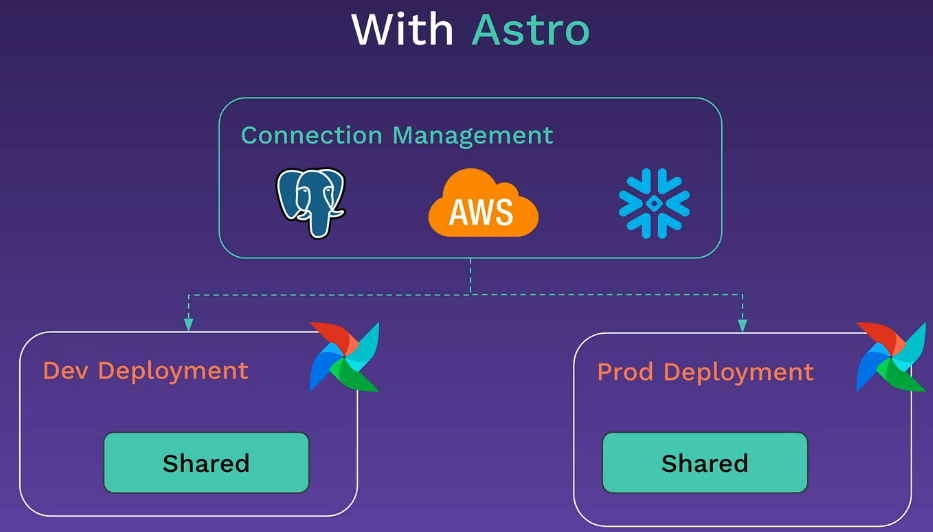

*   a criação de Connections no UI por vezes é muito genérica, necessitando de preenchimento da seção Extra (sendo esta composta de dados do tipo JSON). em situações como essas é necessário checar a documentação o que não é muito conveniente. **com o Astro, a criação de conexões se torna menos genérica, facilitando a criação de conexões**

*   não possui modelo de herança, isto é, valores são repetidos constantemente, por exemplo, de acordo com o ambiente trabalhado (dev e prod). ainda a respeito disso, quando necessário mudar de conta, todas as contas devem ser alteradas. **com Astro e seu gerenciador de conexões podemos fazer com que atributos em comum estejam armazenados de modo separado, permitindo herdar parametros em comum, reduzindo a redundância**

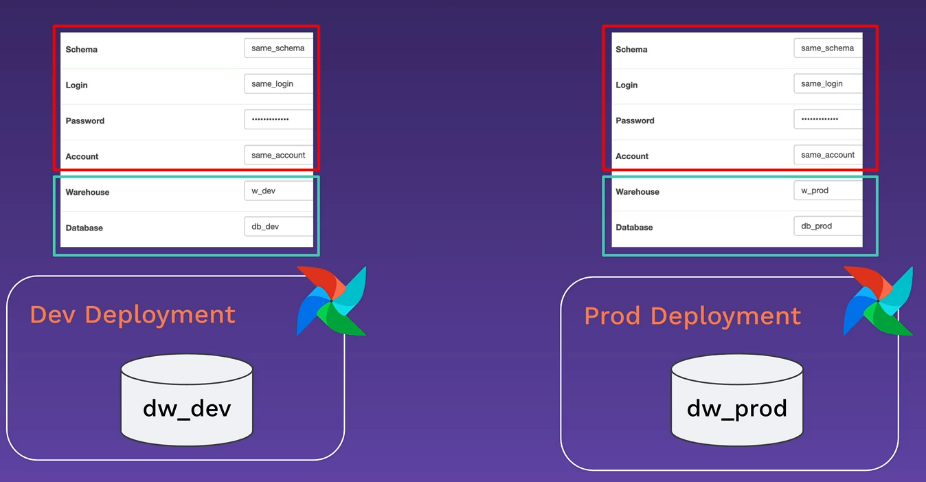

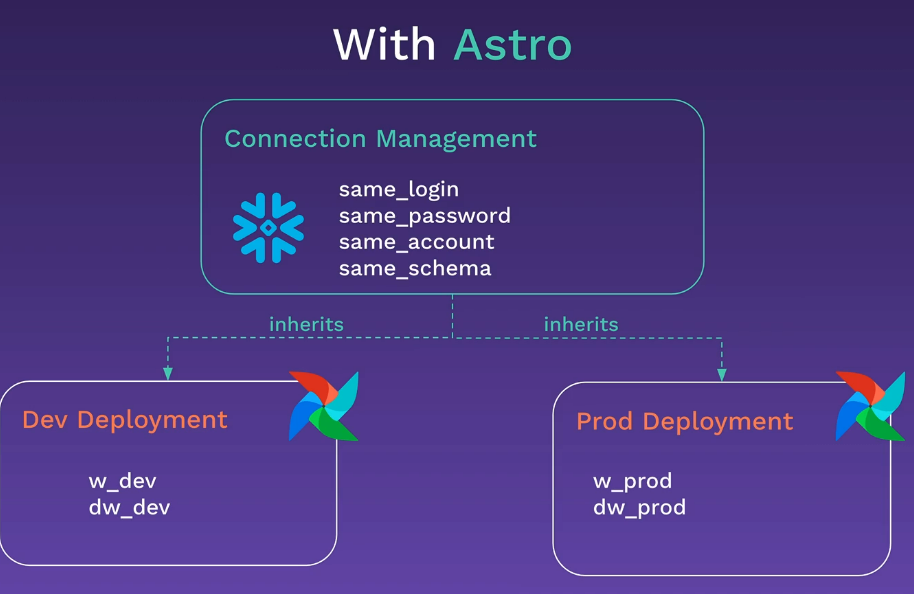

## **XCOM**

**podem ser acessadas via UI**

propriedades:

*   **key** = é o id da XCOM

*   **value** = é o valor serializável em JSON

*   **task_ids** = é a task que gerou a criação desse XCOM

*   **dag_id** = é a dag que contém a task que gerou a criação da XCOM

*   **timestamp** = é a data de criação da XCOM

*   **logical_date/execution_date** = é a data de execução de cada run da DAG quando a XCOM foi criada

**quando fazer a criação de tasks o parametro ti= se refere a task_instance e serve para fazer o push no metadata databaseda XCOM**

**a id de uma XCOM não necessariamente deve ser única já que diversos critérios, como por exemplo logical_date, timestamp, dag_id, dentre outros, a caracterizam**

In [ ]:
#criando sem especificar parametros da XCOM
from datetime import datetime  
from airflow.decorators import dag, task 

@dag(dag_id='xcom_test',
     catchup=False,
     description='test to train xcom',
     schedule='@daily',
     start_date=datetime(2024,11,10))
def dag_xcom():

    
    @task(task_id='string') 
    def string()->str:
        return 'celular'
    

    @task
    def cellphone(mobile:str)->str:
        print(mobile[::-1])


    cellphone(string())

dag_xcom()

<DAG: xcom_test>

In [ ]:
#criando especificando parametros da XCOM
from datetime import datetime  
from airflow.decorators import dag, task 
from airflow.models.taskinstance import TaskInstance as ti

@dag(dag_id='xcom_test',
     catchup=False,
     description='test to train xcom',
     schedule='@daily',
     start_date=datetime(2024,11,10))
def dag_xcom():

    
    @task(task_id='string') # task instance
    def string(ti:ti=None)->str:
        ti.xcom_push(key='xcom_test', value='celular')
    

    @task(task_id='string_2') 
    def string_2(ti:ti=None)->str:
        ti.xcom_push(key='xcom_test', value='tv')


    @task
    def cellphone(ti:ti=None)->str: # task instance
        phone = ti.xcom_pull(key='xcom_test', task_ids=['string', 'string_2'], dag_id='xcom_test')
        print(phone)


    [string(), string_2()] >> cellphone()


dag_xcom()

<DAG: xcom_test>

XCom pode ainda ser gerada via `return`

**quando gerada dessa forma, `key='return_value'` por padrão**

porém, podemos acessá-la somente com a `task_ids`

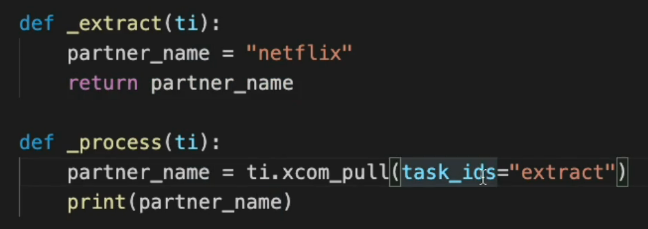

multiplos valores podem ser gerados por meio de uma task e propagado usando XCom

é recomendado o uso de dicionários, dado que estes são JSON serializáveis e em sua criação somente uma conexão com a Metadata database é estabelecida, sendo menos custoso operacionalmente

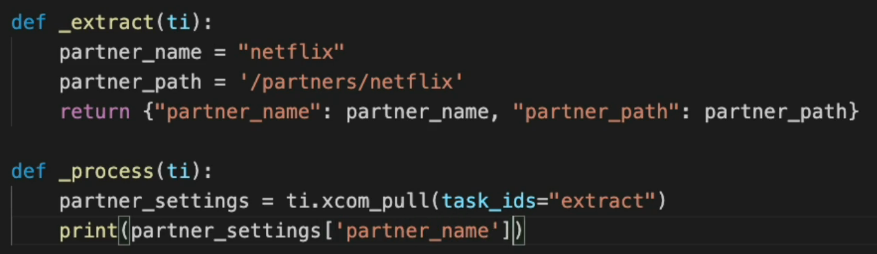

## **Variavéis**

podem ser criadas via UI e são armazenadas por padrão no metadata database. **esse modo não é o mais seguro a ser feito**

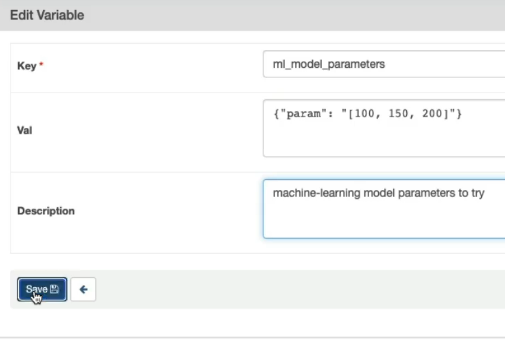

o Apache Airflow UI detecta valores sensiveis de variaveis e permite que sejam encriptografados automaticamente. **palavras como api_key, token, password, authentication, dentre outras automaticamente tem seus valores ocultos**

podemos criar variaveis com `airflow.models.Variable.set()` mas, desse modo, sempre que feita a busca pela variável uma conexão com a metadata database deve ser estabelecida, sendo assim menos eficiente que os próximos métodos apresentados. **esse modo não se enquadra nas boas práticas dado que os valores das variáveis podem ser visiveis na UI e ainda devido ao custo de conexão**

outro modo de criação de variáveis é por meio de **environment variables**

outro modo de criação de variáveis é por meio do **arquivo .env**. para funcionar, após a definição da variavel, é necessário reiniciar o IDE e o terminal

**variáveis criadas por meio de .env são invisíveis no Apache Airflow UI, sendo mais seguras, e não são armazenadas na metadata database, sendo assim mais rápidas de serem acessadas já que nao precisam de uma conexão**

**variáveis podem ser armazenadas em secrets backend**

`Secrets Backend - https://academy.astronomer.io/astro-module-secrets-backend`

podemos **criar variáveis via CLI** usando o seguinte comando `export AIRFLOW_VAR_<NOME_DA_VAR>=<VALUE>`. os contras desse método é a **dificuldade em fazer o gerenciamento**

em Docker podemos definir uma variável de ambiente usando `ENV AIRFLOW_VAR_<NOME_DA_VAR>=<VALUE>`

**via REST API** podemos criar usando o comando `curl` (como na imagem a seguir) e apresenta as mesmas desvantagens do método criado via CLI

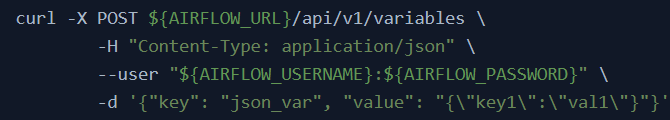

**vantagens de variáveis criadas por .env:**

*   o metadata database não precisa criar uma conexão para buscá-las, sendo mais rápido

*   são ocultas no Apache Airflow UI, sendo mais seguras

*   mais fácil de acompanhar as variáveis no processo de desenvolvimento

para usarmos das variáveis definidas devemos seguir o seguinte procedimento:

In [ ]:
from airflow.decorators import dag, task
from airflow.operators.python import PythonOperator
from airflow.models import Variable
from datetime import datetime


@dag(
    dag_id='dag_variable_dec',
    schedule='@daily',
    start_date=datetime(2024,11,10),
    catchup=False,
)
def dag_variable():

    for ml_model in Variable.get('ML_MODEL_PARAMETERS', deserialize_json=True)['param']: # elas vem como JSON e devemos desserializar
        
        @task
        def first_task():
            PythonOperator(
            task_id=f'ml_task_{ml_model}',
            python_callable=first_task,
            op_kwargs={
                'ml_model':ml_model
            }
        )

**usando `airflow.models.Variable` a cada iteração uma conexão é estabelecida com a metadata database**

**airflow.models.Variable somente devem ser usadas como ultimo recurso, como por exemplo quando o Operator não aceita valores de template**

variáveis podem ainda serem acessadas usando a notação Jinja como descrito em DAGs na seção teórica. o formato para acesso de uma variável nesse caso é: 

`{{ var.value.<nome da variável> }}`

para realizar automaticamente a desserialização do JSON nesta notação procede-se da seguinte maneira:

`{{ var.json.<nome da variável> }}`

**na notação Jinja não é criado uma conexão a cada requerimento sendo mais eficiente**

**não é considerado boas praticas:** 

*   deve-se evitar o uso de `airflow.models.Variable` fora do escopo de tasks ou dentro do Context Manager de DAGs ou dentro de um Operator, dado que a cada parse feito uma nova conexão com a metadata database será estabelecida

**exemplo de boas práticas**

In [ ]:
from datetime import datetime

from airflow import DAG
from airflow.models import Variable
from airflow.operators.python import PythonOperator

def _print_var(val1, val2, val3, val4):
    print(val1)
    print(val2)
    print(val3)
    print(val4)

with DAG('my_dag', start_date=datetime(2024, 1, 1)) as dag:
    print_var = PythonOperator(
        task_id='print_var',
        python_callable=_print_var,
        op_args=[
            '{{ var.value.my_var }}',
            '{{ var.json.my_vars.key1 }}',
            '{{ var.json.my_vars.key2 }}',
            '{{ var.json.my_vars.key3 }}',
        ],
    )

**devemos compactar o máximo possível as variáveis como dicionários, desta forma com uma única conexão conseguimos buscar varios valores**

In [ ]:
# errado
from datetime import datetime

from airflow import DAG
from airflow.models import Variable
from airflow.operators.python import PythonOperator

def _print_vars():
    my_var = Variable.get('my_var')
    another_var = Variable.get('another_var')
    one_more_var = Variable.get('one_more_var')
    print(my_var)
    print(another_var)
    print(one_more_var)

with DAG('my_dag', start_date=datetime(2024, 1, 1)) as dag:
    print_var = PythonOperator(
        task_id='print_vars',
        python_callable=_print_vars,
    )

In [ ]:
# certo

from datetime import datetime

from airflow import DAG
from airflow.models import Variable
from airflow.operators.python import PythonOperator

def _print_vars():
    my_vars = Variable.get('my_vars', deserialize_json=True)
    print(my_vars['key1'])
    print(my_vars['key2'])
    print(my_vars['key3'])

with DAG('my_dag', start_date=datetime(2024, 1, 1)) as dag:
    print_var = PythonOperator(
        task_id='print_vars',
        python_callable=_print_vars,
    )

a ordem com que é buscada a variável pode ser observada no diagrama a seguir, quanto mais superficial mais rápida e menos custosa operacionalmente

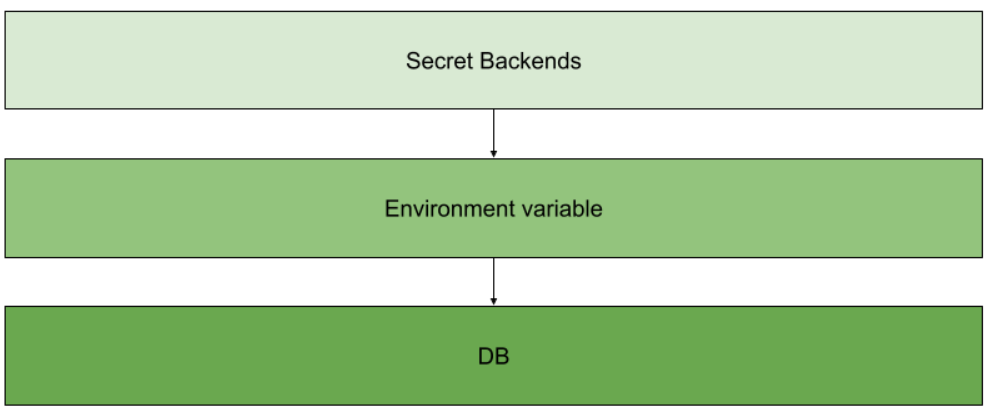

um resumo dessa sessão, bem como os prós e contras de cada método pode ser observado no seguinte link:

`https://academy.astronomer.io/astronomer-certification-apache-airflow-dag-authoring-preparation/891132`

## **Sensores**

sensores externos podem ser adquiridos via pip

tem como padrão de **timeout=7 * 24 * 60 * 60** (7 dias)

**boas práticas de uso de sensores:**

*   sempre definir o `timeout:float=7 * 24 * 60 * 60`

*   sempre que possível e em especial de casos de longo tempo de poke usar `mode='reschedule'`

*   se o `poke_interval:float` < 5 min usar o `mode='poke'`

*   definir um `poke_interval` baseado no uso que se deseja, tendo o intuito de otimizar o processo

In [18]:
from airflow import DAG
from airflow.sensors.python import PythonSensor

def _condition():
    return False

with DAG(
    dag_id="sensor",
    start_date=datetime(2021, 1, 1),
    schedule="@daily",
    catchup=False,
):
    waiting_for_condition = PythonSensor(
        task_id="waiting_for_condition",
        python_callable=_condition,
        poke_interval=60,
        timeout=7 * 24 * 60 * 60 # segundos
    )

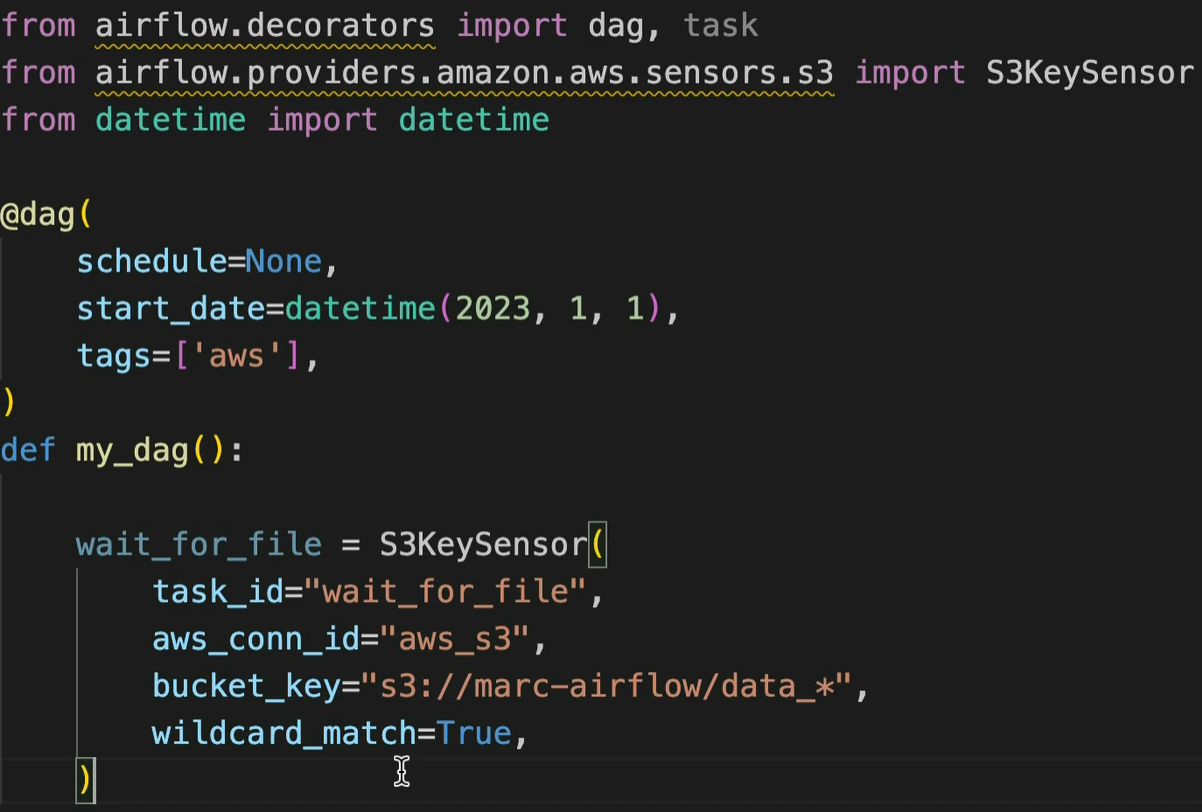

*   ****
### `@task.sensor`

kwargs

*   **mode=poke** se refere ao modo como ele funcionará. no modo **poke** ele inspeciona em intervalos de tempos específicos determinados pelo **poke_interval=** o evento. **o modo poke aloca 1 slot de Worker e 1 de Pool para operar**. seu funcionamento consiste em ligar e desligar esses slots nos intervalor de tempo em que ele deve rastrear; este modo é recomendado em situações onde a execução do sensor é rapida ou o tempo de poke_interval é pequeno. outro modo é o **reschedule** faz uso do slot de Worker quando somente quando necessário. este modo é recomendado em situações onde o tempo é longo


*   **poke_interaval=** determina o intervalo de rastreio do evento. **deve ser maior que 60 segundos para prevenir sobrecarga do Scheduler**

*   **timeout=** tempo limite para a Task ser considerada como falha

*   **soft_fail=False** se True ela marca a Task como SKIPPED quando ocorre a falha

*   **exponention_backoff=** prove maior tempo de intervalo entre as pokes numa escala logaritmica

*   **max_wait=** tempo máximo entre pokes pode ser `timedelta` ou `float`

*   ****
### `airflow.sensors.base.PokeReturnValue`

um objeto de retorno opcional para Sensores

kwargs:

*   **is_done:bool=** se True, sinaliza que o Sensor pode finalizar o poke. se False ele fará novamente o check das condições no poke_interval dado

*   **xcom_value:Any=None** um valor de XCOM para ser transmitido após a execução do Sensor

*   ****
em suma

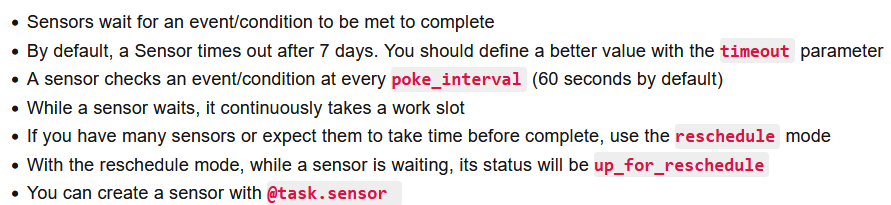

## **Debug DAGs**

fontes de erros comuns e o que fazer:

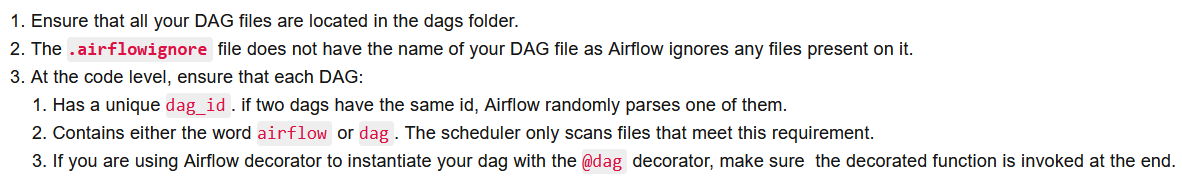

### *DAGs invisíveis no Apache Airflow UI*

*   Apache Airflow checa a cada 5 minutos se novas DAGs estão presentes na pasta dags. este tempo é definido pela configuração `dag_dir_list_interval`

*   updates de DAGs levam 30 segundos para surtirem efeitos por padrão. este tempo é definido pela configuração `min_file_process_interval`

*   em alguns casos o não-aparecimento da DAG é por conta de permissões, por tanto, é necessário checar se temos permissão

*   DAG que não seguem os requisitos de uma DAG podendo, por exemplo, ser circular

*   imports devem usar o full path partindo da pasta dags como root

### *DAGs não estão executando*

*   confirmar que a DAG não está pausada

*   evitar fazer o trigger da DAG imediatamente após alterações uma vez que o Scheduler pode não ter ainda feito a serialização da nova DAG na metadata database

*   garanta que a data de início é menor que a atual. caso seja data futura, a DAG será executada porém nenhuma Task será rodada com sucesso

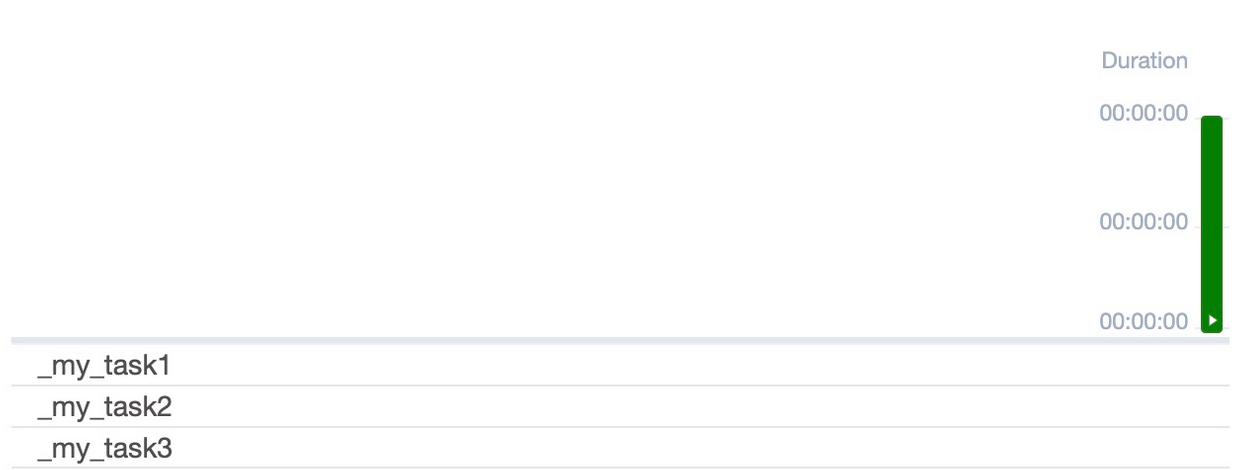

*   garanta que a data final de execução da DAG é futura, caso contrário nenhuma Task é executada

*   em situações onde é necessário varias instâncias da mesma DAG rodando paralelamente é necessário checar as seguintes configurações:

1.  verificar os valores das variaveis `max_active_runs_per_dag=16`, o número maximo de runs de DAGs ativas por DAG

2.  verificar os valores das variaveis `max_active_tasks_per_dag=16`, o numero máximo de instâncias de Tasks permitidas de rodar concorrentemente para cada DAG

3.  verificar os valores das variaveis `parallelism=32`, o numero maximo de instancias de Tasks que podem rodar paralelamente por Scheduler, independente do numero de Workers

## **Debug Scheduler**

checar se o import do provider nas configurações do projeto está sendo feita de modo adequado

## **Debug Connections**

bugs em Connections são comuns em casos onde a Connection foi criada porém somente de modo local, não foi feita a exportação dela usando o Astro CLI ou Airflow CLI. assim, quando tentado fazer a conexão via UI ela falha dado que existe somente de modo local

**testes de Connections executados em UI nem sempre podem ser feitos devido ao modo que ocorre o backend dessa funcionalidade**

**é possível o teste ter sucesso mas a Connection gerar erro e isso se deve ao teste ter sucesso no IP do webserver e não no IP do worker**

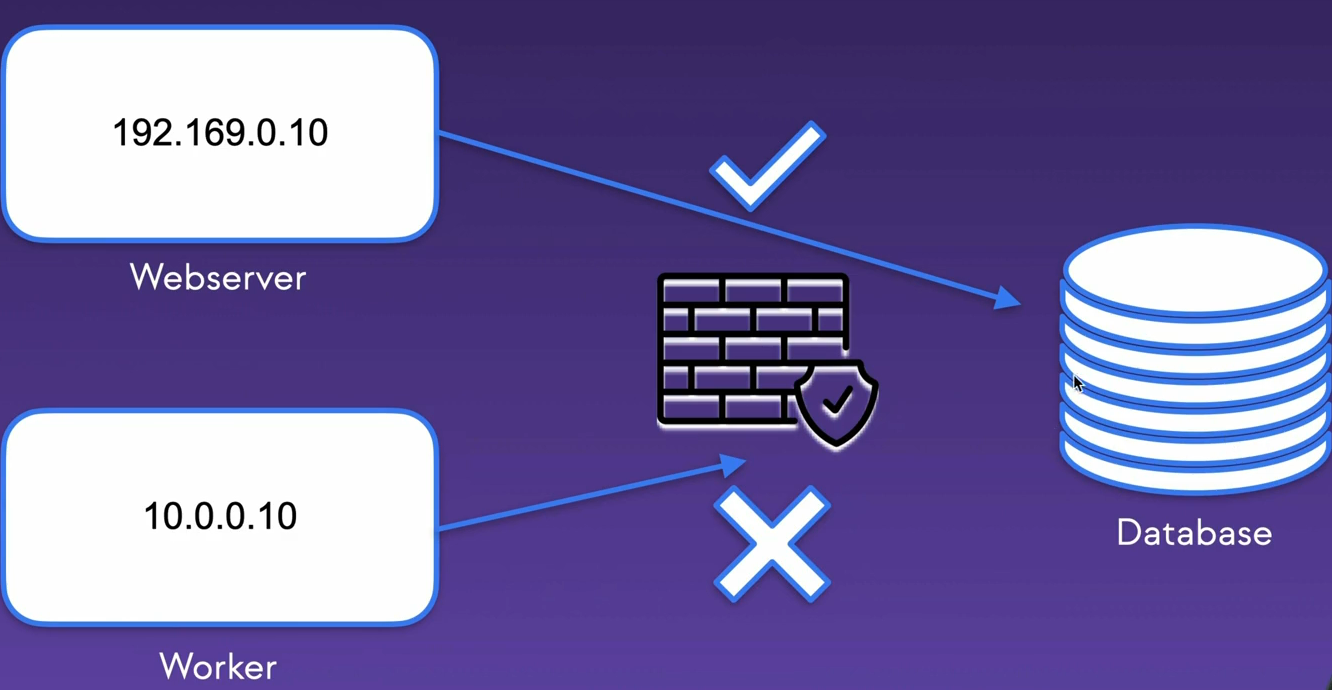

outro erro comum é não especificar o conector num Operator que extrai informações de uma Connection

sempre olhar se existem Connections no arquivo .env, dado que estes não aparecem no UI apesar de existirem

## **Conflitos de dependências (ex.: versões Python)**

para evitar erros de depêndencia é recomendado o uso de venv para cada projeto

algumas ofertas de soluções para execução de Apache Airflow em venv fornecidos pelo próprio Apache Airflow são:

*   `KubernetesPodOperator`: ideal para quem executa o Apache Airflow em Kubernetes e demandam de um maior controle sobre os recursos e infraestrutura necessários para o funcionamento das Tasks. essa solução tem como limitação sua latência de Tasks e setup mais complicado

*   `ExternalPythonOperathor`: pode usar um diferente conjunto de versões Python e suas bibliotecas. pode ser um venv ou qualquer Python pre-instalado e acessível ao Apache Airflow executar suas Tasks

*   `PythonVirtualenvOperator`: similar ao `ExternalPythonOperathor` porém, difere no fato de que aqui ele gera e deleta o venv para cada Task. ideal para situações onde a retenção do venv não é necessária. suas desvantagens são o maior tempo de execução das Tasks, que resultam em maior latência

# Astro CLI

`astro dev init <nome>` cria um projeto de Apache Airflow com seus componentes permitindo escolher, por exemplo, a versão do Apache Airflow, nome do projeto, dentre outros parametros

`astro dev start` inicia o projeto executando 4 containeres, um para cada componente do Apache Airflow (Scheduler, Webserver, Triggerer e Metadata database)

`astro dev restart` reinicializa o projeto

`astro dev stop` pausa os containeres do projeto e a UI

`astro dev run` permite a execução de comandos do Apache Airflow CLI

`astro dev run dags list` roda dags

`astro dev run dags list-import-errors` retorna os erros encontrados em cada DAG

`astro dev logs` retorna os logs do scheduler, worker e webserver para o Apache Airflow local

`astro deployment variable create --deployment-id xxxxx --load --env .env` faz a exportação de conexões, tornando a conexão funcional

`astro dev bash` abre o Apache Airflow CLI diretamente sem precisar do run

**`astro dev run dags backfill` executa backfill**

# Apache Airflow CLI

`airflow db init` inicializa a metadata database

`airflow users create` cria usuarios definindo escopos e dados de cada um

`aiflow users delete` deleta usuarios

`airflow dags list` retorna a lista de todas as DAGs na pasta dags

`airflow dags list-import-errors` retorna os erros possíveis de todas as DAGs na pasta dags

Apache Airflow CLI quando executado em docker: `docker exec -it <container_id> sh`

Apache Airflow CLI quando executado em kubernetes: `kubectl exec -it <scheduler_pod> --sh `

`airflow version` retorna a versão do Apache Airflow

`airflow info` retorna todos os providers, suas versões, ferramentas, paths, dentre outras informações no ambiente usado do Apache Airflow

`airflow config list` retorna todas as configurações do Apache Airflow e suas variáveis de ambiente 

`airflow config get-value <seção> <option>` printa o valor de uma dada configuração

`airflow cheat-sheet` retorna uma cheat sheet dos comandos do CLI

**`airflow tasks test <dag_id> <task_id> <logical_date>` permite o teste de Tasks de uma dada DAG. a Task é executada sem ter suas dependências checadas**

**`airflow dags backfill` é a interface para realizar backfill**

`airflow dags show` mostra as DAGs junto de suas dependencias